In [ ]:
import torch
from torch.autograd import Variable
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_dataset = dsets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = dsets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# MNIST Multilayer Neural Network + dropout

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(784, 512)
        self.fc2 = torch.nn.Linear(512, 256)
        self.fc3 = torch.nn.Linear(256, 10)
        self.dropout = torch.nn.Dropout(0.2)
        
    def forward(self, x):
        x = x.view(-1, 784)
        x = self.dropout(torch.nn.functional.relu(self.fc1(x)))
        x = self.dropout(torch.nn.functional.relu(self.fc2(x)))
        x = torch.nn.functional.log_softmax(self.fc3(x), dim=1)
        return x

## SGD

In [ ]:
# Define the loss function and optimizer
model = Net().to(device)
criterion = torch.nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, nesterov=True, momentum=0.5)
#scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda1)

In [ ]:
# Train the model
train_losses_SGD = []
train_accs = []
for epoch in tqdm(range(200)): # number of epochs
    running_loss = 0.0
    running_acc = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        running_acc += (predicted == labels).sum().item() / len(labels)
    epoch_loss = running_loss / len(train_dataset)
    epoch_acc = running_acc / len(train_dataset)
    train_losses_SGD.append(epoch_loss)
    train_accs.append(epoch_acc)

    print('Epoch %d: Loss=%.4f Acc=%.4f' % (epoch+1, epoch_loss, epoch_acc))


  0%|          | 1/200 [00:07<25:01,  7.55s/it]

Epoch 1: Loss=0.0127 Acc=0.0047


  1%|          | 2/200 [00:15<26:18,  7.97s/it]

Epoch 2: Loss=0.0045 Acc=0.0065


  2%|▏         | 3/200 [00:24<26:34,  8.09s/it]

Epoch 3: Loss=0.0034 Acc=0.0068


  2%|▏         | 4/200 [00:31<25:35,  7.84s/it]

Epoch 4: Loss=0.0029 Acc=0.0070


  2%|▎         | 5/200 [00:39<25:49,  7.95s/it]

Epoch 5: Loss=0.0026 Acc=0.0071


  3%|▎         | 6/200 [00:47<25:41,  7.95s/it]

Epoch 6: Loss=0.0024 Acc=0.0071


  4%|▎         | 7/200 [00:55<25:10,  7.83s/it]

Epoch 7: Loss=0.0022 Acc=0.0072


  4%|▍         | 8/200 [01:03<25:14,  7.89s/it]

Epoch 8: Loss=0.0021 Acc=0.0072


  4%|▍         | 9/200 [01:11<25:30,  8.01s/it]

Epoch 9: Loss=0.0019 Acc=0.0073


  5%|▌         | 10/200 [01:18<24:49,  7.84s/it]

Epoch 10: Loss=0.0018 Acc=0.0073


  6%|▌         | 11/200 [01:27<24:56,  7.92s/it]

Epoch 11: Loss=0.0017 Acc=0.0073


  6%|▌         | 12/200 [01:35<25:14,  8.06s/it]

Epoch 12: Loss=0.0016 Acc=0.0074


  6%|▋         | 13/200 [01:43<25:00,  8.02s/it]

Epoch 13: Loss=0.0015 Acc=0.0074


  7%|▋         | 14/200 [01:51<25:02,  8.08s/it]

Epoch 14: Loss=0.0014 Acc=0.0074


  8%|▊         | 15/200 [01:59<24:48,  8.05s/it]

Epoch 15: Loss=0.0013 Acc=0.0074


  8%|▊         | 16/200 [02:07<24:39,  8.04s/it]

Epoch 16: Loss=0.0013 Acc=0.0074


  8%|▊         | 17/200 [02:15<24:47,  8.13s/it]

Epoch 17: Loss=0.0012 Acc=0.0075


  9%|▉         | 18/200 [02:23<24:35,  8.11s/it]

Epoch 18: Loss=0.0012 Acc=0.0075


 10%|▉         | 19/200 [02:31<24:04,  7.98s/it]

Epoch 19: Loss=0.0011 Acc=0.0075


 10%|█         | 20/200 [02:39<24:10,  8.06s/it]

Epoch 20: Loss=0.0011 Acc=0.0075


 10%|█         | 21/200 [02:48<24:09,  8.10s/it]

Epoch 21: Loss=0.0010 Acc=0.0075


 11%|█         | 22/200 [02:55<23:26,  7.90s/it]

Epoch 22: Loss=0.0010 Acc=0.0075


 12%|█▏        | 23/200 [03:03<23:34,  7.99s/it]

Epoch 23: Loss=0.0010 Acc=0.0075


 12%|█▏        | 24/200 [03:11<23:14,  7.92s/it]

Epoch 24: Loss=0.0009 Acc=0.0075


 12%|█▎        | 25/200 [03:19<22:55,  7.86s/it]

Epoch 25: Loss=0.0009 Acc=0.0076


 13%|█▎        | 26/200 [03:27<22:55,  7.91s/it]

Epoch 26: Loss=0.0009 Acc=0.0076


 14%|█▎        | 27/200 [03:34<22:40,  7.86s/it]

Epoch 27: Loss=0.0008 Acc=0.0076


 14%|█▍        | 28/200 [03:42<22:36,  7.88s/it]

Epoch 28: Loss=0.0008 Acc=0.0076


 14%|█▍        | 29/200 [03:50<22:32,  7.91s/it]

Epoch 29: Loss=0.0008 Acc=0.0076


 15%|█▌        | 30/200 [03:58<21:56,  7.74s/it]

Epoch 30: Loss=0.0007 Acc=0.0076


 16%|█▌        | 31/200 [04:06<21:57,  7.80s/it]

Epoch 31: Loss=0.0007 Acc=0.0076


 16%|█▌        | 32/200 [04:13<21:52,  7.81s/it]

Epoch 32: Loss=0.0007 Acc=0.0076


 16%|█▋        | 33/200 [04:21<21:18,  7.65s/it]

Epoch 33: Loss=0.0007 Acc=0.0076


 17%|█▋        | 34/200 [04:29<21:19,  7.71s/it]

Epoch 34: Loss=0.0007 Acc=0.0076


 18%|█▊        | 35/200 [04:37<21:22,  7.77s/it]

Epoch 35: Loss=0.0007 Acc=0.0076


 18%|█▊        | 36/200 [04:44<20:46,  7.60s/it]

Epoch 36: Loss=0.0006 Acc=0.0076


 18%|█▊        | 37/200 [04:52<20:54,  7.69s/it]

Epoch 37: Loss=0.0006 Acc=0.0076


 19%|█▉        | 38/200 [04:59<20:36,  7.63s/it]

Epoch 38: Loss=0.0006 Acc=0.0076


 20%|█▉        | 39/200 [05:07<20:27,  7.62s/it]

Epoch 39: Loss=0.0006 Acc=0.0076


 20%|██        | 40/200 [05:15<20:41,  7.76s/it]

Epoch 40: Loss=0.0006 Acc=0.0077


 20%|██        | 41/200 [05:22<20:09,  7.61s/it]

Epoch 41: Loss=0.0006 Acc=0.0077


 21%|██        | 42/200 [05:30<20:21,  7.73s/it]

Epoch 42: Loss=0.0005 Acc=0.0077


 22%|██▏       | 43/200 [05:38<20:27,  7.82s/it]

Epoch 43: Loss=0.0005 Acc=0.0077


 22%|██▏       | 44/200 [05:45<19:54,  7.66s/it]

Epoch 44: Loss=0.0005 Acc=0.0077


 22%|██▎       | 45/200 [05:53<20:00,  7.75s/it]

Epoch 45: Loss=0.0005 Acc=0.0077


 23%|██▎       | 46/200 [06:02<20:12,  7.87s/it]

Epoch 46: Loss=0.0005 Acc=0.0077


 24%|██▎       | 47/200 [06:09<19:40,  7.72s/it]

Epoch 47: Loss=0.0005 Acc=0.0077


 24%|██▍       | 48/200 [06:17<19:42,  7.78s/it]

Epoch 48: Loss=0.0005 Acc=0.0077


 24%|██▍       | 49/200 [06:24<19:31,  7.76s/it]

Epoch 49: Loss=0.0005 Acc=0.0077


 25%|██▌       | 50/200 [06:32<19:04,  7.63s/it]

Epoch 50: Loss=0.0005 Acc=0.0077


 26%|██▌       | 51/200 [06:40<19:11,  7.73s/it]

Epoch 51: Loss=0.0004 Acc=0.0077


 26%|██▌       | 52/200 [06:47<18:46,  7.61s/it]

Epoch 52: Loss=0.0004 Acc=0.0077


 26%|██▋       | 53/200 [06:55<18:42,  7.64s/it]

Epoch 53: Loss=0.0004 Acc=0.0077


 27%|██▋       | 54/200 [07:03<18:47,  7.72s/it]

Epoch 54: Loss=0.0004 Acc=0.0077


 28%|██▊       | 55/200 [07:10<18:18,  7.57s/it]

Epoch 55: Loss=0.0004 Acc=0.0077


 28%|██▊       | 56/200 [07:18<18:20,  7.64s/it]

Epoch 56: Loss=0.0004 Acc=0.0077


 28%|██▊       | 57/200 [07:26<18:17,  7.67s/it]

Epoch 57: Loss=0.0004 Acc=0.0077


 29%|██▉       | 58/200 [07:33<17:53,  7.56s/it]

Epoch 58: Loss=0.0004 Acc=0.0077


 30%|██▉       | 59/200 [07:41<17:59,  7.66s/it]

Epoch 59: Loss=0.0004 Acc=0.0077


 30%|███       | 60/200 [07:48<17:49,  7.64s/it]

Epoch 60: Loss=0.0004 Acc=0.0077


 30%|███       | 61/200 [07:56<17:33,  7.58s/it]

Epoch 61: Loss=0.0004 Acc=0.0077


 31%|███       | 62/200 [08:04<17:38,  7.67s/it]

Epoch 62: Loss=0.0004 Acc=0.0077


 32%|███▏      | 63/200 [08:11<17:11,  7.53s/it]

Epoch 63: Loss=0.0003 Acc=0.0077


 32%|███▏      | 64/200 [08:19<17:14,  7.61s/it]

Epoch 64: Loss=0.0003 Acc=0.0077


 32%|███▎      | 65/200 [08:26<17:16,  7.68s/it]

Epoch 65: Loss=0.0003 Acc=0.0077


 33%|███▎      | 66/200 [08:34<16:46,  7.51s/it]

Epoch 66: Loss=0.0003 Acc=0.0077


 34%|███▎      | 67/200 [08:41<16:53,  7.62s/it]

Epoch 67: Loss=0.0003 Acc=0.0077


 34%|███▍      | 68/200 [08:49<16:55,  7.70s/it]

Epoch 68: Loss=0.0003 Acc=0.0077


 34%|███▍      | 69/200 [08:56<16:27,  7.53s/it]

Epoch 69: Loss=0.0003 Acc=0.0077


 35%|███▌      | 70/200 [09:04<16:31,  7.62s/it]

Epoch 70: Loss=0.0003 Acc=0.0077


 36%|███▌      | 71/200 [09:12<16:18,  7.58s/it]

Epoch 71: Loss=0.0003 Acc=0.0077


 36%|███▌      | 72/200 [09:19<16:13,  7.61s/it]

Epoch 72: Loss=0.0003 Acc=0.0077


 36%|███▋      | 73/200 [09:27<16:15,  7.68s/it]

Epoch 73: Loss=0.0003 Acc=0.0077


 37%|███▋      | 74/200 [09:35<15:53,  7.56s/it]

Epoch 74: Loss=0.0003 Acc=0.0077


 38%|███▊      | 75/200 [09:42<15:57,  7.66s/it]

Epoch 75: Loss=0.0003 Acc=0.0077


 38%|███▊      | 76/200 [09:51<16:03,  7.77s/it]

Epoch 76: Loss=0.0003 Acc=0.0077


 38%|███▊      | 77/200 [09:58<15:32,  7.58s/it]

Epoch 77: Loss=0.0003 Acc=0.0077


 39%|███▉      | 78/200 [10:06<15:38,  7.69s/it]

Epoch 78: Loss=0.0003 Acc=0.0077


 40%|███▉      | 79/200 [10:14<15:45,  7.82s/it]

Epoch 79: Loss=0.0003 Acc=0.0077


 40%|████      | 80/200 [10:21<15:14,  7.62s/it]

Epoch 80: Loss=0.0003 Acc=0.0077


 40%|████      | 81/200 [10:29<15:13,  7.68s/it]

Epoch 81: Loss=0.0003 Acc=0.0077


 41%|████      | 82/200 [10:37<15:13,  7.74s/it]

Epoch 82: Loss=0.0002 Acc=0.0077


 42%|████▏     | 83/200 [10:44<15:04,  7.73s/it]

Epoch 83: Loss=0.0002 Acc=0.0077


 42%|████▏     | 84/200 [10:52<15:03,  7.79s/it]

Epoch 84: Loss=0.0002 Acc=0.0078


 42%|████▎     | 85/200 [10:59<14:36,  7.62s/it]

Epoch 85: Loss=0.0002 Acc=0.0078


 43%|████▎     | 86/200 [11:07<14:40,  7.73s/it]

Epoch 86: Loss=0.0002 Acc=0.0078


 44%|████▎     | 87/200 [11:15<14:35,  7.75s/it]

Epoch 87: Loss=0.0002 Acc=0.0078


 44%|████▍     | 88/200 [11:22<14:08,  7.57s/it]

Epoch 88: Loss=0.0002 Acc=0.0078


 44%|████▍     | 89/200 [11:30<14:08,  7.64s/it]

Epoch 89: Loss=0.0002 Acc=0.0078


 45%|████▌     | 90/200 [11:38<14:08,  7.72s/it]

Epoch 90: Loss=0.0002 Acc=0.0078


 46%|████▌     | 91/200 [11:45<13:43,  7.55s/it]

Epoch 91: Loss=0.0002 Acc=0.0078


 46%|████▌     | 92/200 [11:53<13:45,  7.64s/it]

Epoch 92: Loss=0.0002 Acc=0.0078


 46%|████▋     | 93/200 [12:01<13:35,  7.62s/it]

Epoch 93: Loss=0.0002 Acc=0.0078


 47%|████▋     | 94/200 [12:08<13:27,  7.62s/it]

Epoch 94: Loss=0.0002 Acc=0.0078


 48%|████▊     | 95/200 [12:16<13:25,  7.67s/it]

Epoch 95: Loss=0.0002 Acc=0.0078


 48%|████▊     | 96/200 [12:23<13:02,  7.52s/it]

Epoch 96: Loss=0.0002 Acc=0.0078


 48%|████▊     | 97/200 [12:31<13:04,  7.61s/it]

Epoch 97: Loss=0.0002 Acc=0.0078


 49%|████▉     | 98/200 [12:39<13:02,  7.67s/it]

Epoch 98: Loss=0.0002 Acc=0.0078


 50%|████▉     | 99/200 [12:46<12:38,  7.51s/it]

Epoch 99: Loss=0.0002 Acc=0.0078


 50%|█████     | 100/200 [12:54<12:41,  7.61s/it]

Epoch 100: Loss=0.0002 Acc=0.0078


 50%|█████     | 101/200 [13:02<12:38,  7.66s/it]

Epoch 101: Loss=0.0002 Acc=0.0078


 51%|█████     | 102/200 [13:09<12:19,  7.55s/it]

Epoch 102: Loss=0.0002 Acc=0.0078


 52%|█████▏    | 103/200 [13:17<12:19,  7.63s/it]

Epoch 103: Loss=0.0002 Acc=0.0078


 52%|█████▏    | 104/200 [13:24<12:04,  7.54s/it]

Epoch 104: Loss=0.0002 Acc=0.0078


 52%|█████▎    | 105/200 [13:32<12:03,  7.61s/it]

Epoch 105: Loss=0.0002 Acc=0.0078


 53%|█████▎    | 106/200 [13:40<12:02,  7.68s/it]

Epoch 106: Loss=0.0002 Acc=0.0078


 54%|█████▎    | 107/200 [13:47<11:40,  7.53s/it]

Epoch 107: Loss=0.0002 Acc=0.0078


 54%|█████▍    | 108/200 [13:55<11:38,  7.59s/it]

Epoch 108: Loss=0.0002 Acc=0.0078


 55%|█████▍    | 109/200 [14:02<11:36,  7.65s/it]

Epoch 109: Loss=0.0002 Acc=0.0078


 55%|█████▌    | 110/200 [14:10<11:15,  7.51s/it]

Epoch 110: Loss=0.0002 Acc=0.0078


 56%|█████▌    | 111/200 [14:17<11:15,  7.59s/it]

Epoch 111: Loss=0.0002 Acc=0.0078


 56%|█████▌    | 112/200 [14:25<11:01,  7.51s/it]

Epoch 112: Loss=0.0002 Acc=0.0078


 56%|█████▋    | 113/200 [14:32<10:52,  7.50s/it]

Epoch 113: Loss=0.0002 Acc=0.0078


 57%|█████▋    | 114/200 [14:40<10:54,  7.61s/it]

Epoch 114: Loss=0.0001 Acc=0.0078


 57%|█████▊    | 115/200 [14:47<10:35,  7.48s/it]

Epoch 115: Loss=0.0001 Acc=0.0078


 58%|█████▊    | 116/200 [14:55<10:36,  7.58s/it]

Epoch 116: Loss=0.0001 Acc=0.0078


 58%|█████▊    | 117/200 [15:03<10:35,  7.65s/it]

Epoch 117: Loss=0.0001 Acc=0.0078


 59%|█████▉    | 118/200 [15:10<10:15,  7.51s/it]

Epoch 118: Loss=0.0001 Acc=0.0078


 60%|█████▉    | 119/200 [15:18<10:15,  7.60s/it]

Epoch 119: Loss=0.0001 Acc=0.0078


 60%|██████    | 120/200 [15:25<10:05,  7.56s/it]

Epoch 120: Loss=0.0001 Acc=0.0078


 60%|██████    | 121/200 [15:33<09:53,  7.51s/it]

Epoch 121: Loss=0.0001 Acc=0.0078


 61%|██████    | 122/200 [15:40<09:50,  7.58s/it]

Epoch 122: Loss=0.0001 Acc=0.0078


 62%|██████▏   | 123/200 [15:48<09:35,  7.47s/it]

Epoch 123: Loss=0.0001 Acc=0.0078


 62%|██████▏   | 124/200 [15:56<09:37,  7.60s/it]

Epoch 124: Loss=0.0001 Acc=0.0078


 62%|██████▎   | 125/200 [16:03<09:36,  7.68s/it]

Epoch 125: Loss=0.0001 Acc=0.0078


 63%|██████▎   | 126/200 [16:11<09:18,  7.55s/it]

Epoch 126: Loss=0.0001 Acc=0.0078


 64%|██████▎   | 127/200 [16:19<09:17,  7.64s/it]

Epoch 127: Loss=0.0001 Acc=0.0078


 64%|██████▍   | 128/200 [16:26<09:12,  7.68s/it]

Epoch 128: Loss=0.0001 Acc=0.0078


 64%|██████▍   | 129/200 [16:33<08:51,  7.49s/it]

Epoch 129: Loss=0.0001 Acc=0.0078


 65%|██████▌   | 130/200 [16:41<08:49,  7.56s/it]

Epoch 130: Loss=0.0001 Acc=0.0078


 66%|██████▌   | 131/200 [16:48<08:33,  7.45s/it]

Epoch 131: Loss=0.0001 Acc=0.0078


 66%|██████▌   | 132/200 [16:56<08:32,  7.54s/it]

Epoch 132: Loss=0.0001 Acc=0.0078


 66%|██████▋   | 133/200 [17:04<08:29,  7.61s/it]

Epoch 133: Loss=0.0001 Acc=0.0078


 67%|██████▋   | 134/200 [17:11<08:13,  7.48s/it]

Epoch 134: Loss=0.0001 Acc=0.0078


 68%|██████▊   | 135/200 [17:19<08:12,  7.58s/it]

Epoch 135: Loss=0.0001 Acc=0.0078


 68%|██████▊   | 136/200 [17:27<08:10,  7.66s/it]

Epoch 136: Loss=0.0001 Acc=0.0078


 68%|██████▊   | 137/200 [17:34<07:53,  7.52s/it]

Epoch 137: Loss=0.0001 Acc=0.0078


 69%|██████▉   | 138/200 [17:42<07:51,  7.60s/it]

Epoch 138: Loss=0.0001 Acc=0.0078


 70%|██████▉   | 139/200 [17:49<07:40,  7.55s/it]

Epoch 139: Loss=0.0001 Acc=0.0078


 70%|███████   | 140/200 [17:57<07:32,  7.54s/it]

Epoch 140: Loss=0.0001 Acc=0.0078


 70%|███████   | 141/200 [18:04<07:29,  7.62s/it]

Epoch 141: Loss=0.0001 Acc=0.0078


 71%|███████   | 142/200 [18:12<07:14,  7.49s/it]

Epoch 142: Loss=0.0001 Acc=0.0078


 72%|███████▏  | 143/200 [18:19<07:12,  7.60s/it]

Epoch 143: Loss=0.0001 Acc=0.0078


 72%|███████▏  | 144/200 [18:27<07:07,  7.63s/it]

Epoch 144: Loss=0.0001 Acc=0.0078


 72%|███████▎  | 145/200 [18:34<06:50,  7.47s/it]

Epoch 145: Loss=0.0001 Acc=0.0078


 73%|███████▎  | 146/200 [18:42<06:49,  7.59s/it]

Epoch 146: Loss=0.0001 Acc=0.0078


 74%|███████▎  | 147/200 [18:50<06:41,  7.58s/it]

Epoch 147: Loss=0.0001 Acc=0.0078


 74%|███████▍  | 148/200 [18:57<06:31,  7.54s/it]

Epoch 148: Loss=0.0001 Acc=0.0078


 74%|███████▍  | 149/200 [19:05<06:28,  7.62s/it]

Epoch 149: Loss=0.0001 Acc=0.0078


 75%|███████▌  | 150/200 [19:12<06:14,  7.48s/it]

Epoch 150: Loss=0.0001 Acc=0.0078


 76%|███████▌  | 151/200 [19:20<06:10,  7.56s/it]

Epoch 151: Loss=0.0001 Acc=0.0078


 76%|███████▌  | 152/200 [19:28<06:05,  7.61s/it]

Epoch 152: Loss=0.0001 Acc=0.0078


 76%|███████▋  | 153/200 [19:35<05:51,  7.48s/it]

Epoch 153: Loss=0.0001 Acc=0.0078


 77%|███████▋  | 154/200 [19:42<05:47,  7.55s/it]

Epoch 154: Loss=0.0001 Acc=0.0078


 78%|███████▊  | 155/200 [19:50<05:40,  7.56s/it]

Epoch 155: Loss=0.0001 Acc=0.0078


 78%|███████▊  | 156/200 [19:57<05:28,  7.47s/it]

Epoch 156: Loss=0.0001 Acc=0.0078


 78%|███████▊  | 157/200 [20:05<05:26,  7.58s/it]

Epoch 157: Loss=0.0001 Acc=0.0078


 79%|███████▉  | 158/200 [20:12<05:13,  7.47s/it]

Epoch 158: Loss=0.0001 Acc=0.0078


 80%|███████▉  | 159/200 [20:20<05:11,  7.59s/it]

Epoch 159: Loss=0.0001 Acc=0.0078


 80%|████████  | 160/200 [20:28<05:06,  7.66s/it]

Epoch 160: Loss=0.0001 Acc=0.0078


 80%|████████  | 161/200 [20:35<04:51,  7.48s/it]

Epoch 161: Loss=0.0001 Acc=0.0078


 81%|████████  | 162/200 [20:43<04:48,  7.58s/it]

Epoch 162: Loss=0.0001 Acc=0.0078


 82%|████████▏ | 163/200 [20:51<04:43,  7.66s/it]

Epoch 163: Loss=0.0001 Acc=0.0078


 82%|████████▏ | 164/200 [20:58<04:30,  7.51s/it]

Epoch 164: Loss=0.0001 Acc=0.0078


 82%|████████▎ | 165/200 [21:06<04:26,  7.60s/it]

Epoch 165: Loss=0.0001 Acc=0.0078


 83%|████████▎ | 166/200 [21:13<04:14,  7.49s/it]

Epoch 166: Loss=0.0001 Acc=0.0078


 84%|████████▎ | 167/200 [21:21<04:10,  7.58s/it]

Epoch 167: Loss=0.0001 Acc=0.0078


 84%|████████▍ | 168/200 [21:28<04:04,  7.64s/it]

Epoch 168: Loss=0.0001 Acc=0.0078


 84%|████████▍ | 169/200 [21:36<03:52,  7.50s/it]

Epoch 169: Loss=0.0001 Acc=0.0078


 85%|████████▌ | 170/200 [21:43<03:47,  7.58s/it]

Epoch 170: Loss=0.0001 Acc=0.0078


 86%|████████▌ | 171/200 [21:51<03:42,  7.68s/it]

Epoch 171: Loss=0.0001 Acc=0.0078


 86%|████████▌ | 172/200 [21:58<03:29,  7.48s/it]

Epoch 172: Loss=0.0001 Acc=0.0078


 86%|████████▋ | 173/200 [22:06<03:24,  7.58s/it]

Epoch 173: Loss=0.0001 Acc=0.0078


 87%|████████▋ | 174/200 [22:14<03:15,  7.53s/it]

Epoch 174: Loss=0.0001 Acc=0.0078


 88%|████████▊ | 175/200 [22:21<03:07,  7.52s/it]

Epoch 175: Loss=0.0001 Acc=0.0078


 88%|████████▊ | 176/200 [22:29<03:01,  7.57s/it]

Epoch 176: Loss=0.0001 Acc=0.0078


 88%|████████▊ | 177/200 [22:36<02:50,  7.42s/it]

Epoch 177: Loss=0.0001 Acc=0.0078


 89%|████████▉ | 178/200 [22:44<02:45,  7.54s/it]

Epoch 178: Loss=0.0001 Acc=0.0078


 90%|████████▉ | 179/200 [22:51<02:39,  7.62s/it]

Epoch 179: Loss=0.0001 Acc=0.0078


 90%|█████████ | 180/200 [22:59<02:29,  7.49s/it]

Epoch 180: Loss=0.0001 Acc=0.0078


 90%|█████████ | 181/200 [23:07<02:25,  7.64s/it]

Epoch 181: Loss=0.0001 Acc=0.0078


 91%|█████████ | 182/200 [23:14<02:16,  7.58s/it]

Epoch 182: Loss=0.0001 Acc=0.0078


 92%|█████████▏| 183/200 [23:22<02:08,  7.55s/it]

Epoch 183: Loss=0.0001 Acc=0.0078


 92%|█████████▏| 184/200 [23:29<02:01,  7.61s/it]

Epoch 184: Loss=0.0001 Acc=0.0078


 92%|█████████▎| 185/200 [23:36<01:52,  7.47s/it]

Epoch 185: Loss=0.0001 Acc=0.0078


 93%|█████████▎| 186/200 [23:44<01:45,  7.56s/it]

Epoch 186: Loss=0.0001 Acc=0.0078


 94%|█████████▎| 187/200 [23:52<01:40,  7.71s/it]

Epoch 187: Loss=0.0001 Acc=0.0078


 94%|█████████▍| 188/200 [23:59<01:30,  7.57s/it]

Epoch 188: Loss=0.0001 Acc=0.0078


 94%|█████████▍| 189/200 [24:07<01:24,  7.66s/it]

Epoch 189: Loss=0.0001 Acc=0.0078


 95%|█████████▌| 190/200 [24:15<01:17,  7.70s/it]

Epoch 190: Loss=0.0001 Acc=0.0078


 96%|█████████▌| 191/200 [24:23<01:08,  7.60s/it]

Epoch 191: Loss=0.0001 Acc=0.0078


 96%|█████████▌| 192/200 [24:30<01:01,  7.68s/it]

Epoch 192: Loss=0.0001 Acc=0.0078


 96%|█████████▋| 193/200 [24:38<00:53,  7.58s/it]

Epoch 193: Loss=0.0001 Acc=0.0078


 97%|█████████▋| 194/200 [24:45<00:45,  7.55s/it]

Epoch 194: Loss=0.0001 Acc=0.0078


 98%|█████████▊| 195/200 [24:53<00:38,  7.69s/it]

Epoch 195: Loss=0.0001 Acc=0.0078


 98%|█████████▊| 196/200 [25:00<00:30,  7.53s/it]

Epoch 196: Loss=0.0001 Acc=0.0078


 98%|█████████▊| 197/200 [25:08<00:22,  7.58s/it]

Epoch 197: Loss=0.0001 Acc=0.0078


 99%|█████████▉| 198/200 [25:16<00:15,  7.62s/it]

Epoch 198: Loss=0.0001 Acc=0.0078


100%|█████████▉| 199/200 [25:23<00:07,  7.49s/it]

Epoch 199: Loss=0.0001 Acc=0.0078


100%|██████████| 200/200 [25:31<00:00,  7.66s/it]

Epoch 200: Loss=0.0001 Acc=0.0078


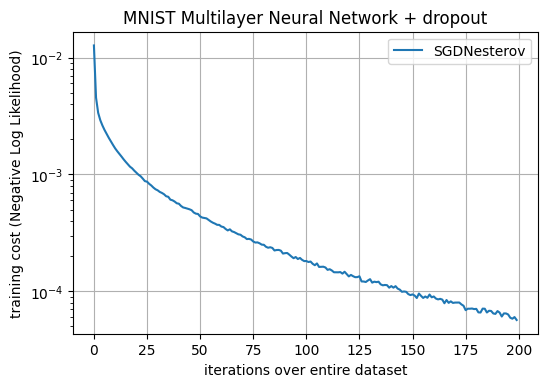

In [ ]:
# Plot the negative log likelihood training cost over iterations
plt.figure(figsize=(6,4), dpi=100)
plt.plot(train_losses_SGD, label='SGDNesterov')
plt.grid(True)

plt.title('MNIST Multilayer Neural Network + dropout')
plt.xlabel('iterations over entire dataset')
plt.ylabel('training cost (Negative Log Likelihood)')
plt.yscale('log')
plt.legend()
plt.show()

## Adam

In [ ]:
model = Net().to(device)
criterion = torch.nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
# Train the model
train_losses_Adam = []
train_accs_Adam = []
for epoch in tqdm(range(200)): # number of epochs
    running_loss = 0.0
    running_acc = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        running_acc += (predicted == labels).sum().item() / len(labels)
    epoch_loss = running_loss / len(train_dataset)
    epoch_acc = running_acc / len(train_dataset)
    train_losses_Adam.append(epoch_loss)
    train_accs_Adam.append(epoch_acc)

    print('Epoch %d: Loss=%.4f Acc=%.4f' % (epoch+1, epoch_loss, epoch_acc))


  0%|          | 1/200 [00:11<36:58, 11.15s/it]

Epoch 1: Loss=0.0024 Acc=0.0071


  1%|          | 2/200 [00:19<31:06,  9.43s/it]

Epoch 2: Loss=0.0017 Acc=0.0074


  2%|▏         | 3/200 [00:26<28:07,  8.56s/it]

Epoch 3: Loss=0.0016 Acc=0.0074


  2%|▏         | 4/200 [00:34<27:18,  8.36s/it]

Epoch 4: Loss=0.0015 Acc=0.0074


  2%|▎         | 5/200 [00:43<26:48,  8.25s/it]

Epoch 5: Loss=0.0014 Acc=0.0075


  3%|▎         | 6/200 [00:50<26:01,  8.05s/it]

Epoch 6: Loss=0.0013 Acc=0.0075


  4%|▎         | 7/200 [01:00<27:51,  8.66s/it]

Epoch 7: Loss=0.0013 Acc=0.0075


  4%|▍         | 8/200 [01:08<27:12,  8.50s/it]

Epoch 8: Loss=0.0012 Acc=0.0075


  4%|▍         | 9/200 [01:16<25:58,  8.16s/it]

Epoch 9: Loss=0.0013 Acc=0.0075


  5%|▌         | 10/200 [01:24<25:41,  8.12s/it]

Epoch 10: Loss=0.0012 Acc=0.0075


  6%|▌         | 11/200 [01:32<25:59,  8.25s/it]

Epoch 11: Loss=0.0012 Acc=0.0075


  6%|▌         | 12/200 [01:40<25:02,  7.99s/it]

Epoch 12: Loss=0.0012 Acc=0.0075


  6%|▋         | 13/200 [01:48<25:08,  8.07s/it]

Epoch 13: Loss=0.0012 Acc=0.0075


  7%|▋         | 14/200 [01:56<24:56,  8.05s/it]

Epoch 14: Loss=0.0011 Acc=0.0076


  8%|▊         | 15/200 [02:03<24:10,  7.84s/it]

Epoch 15: Loss=0.0012 Acc=0.0075


  8%|▊         | 16/200 [02:11<24:13,  7.90s/it]

Epoch 16: Loss=0.0012 Acc=0.0075


  8%|▊         | 17/200 [02:19<24:19,  7.97s/it]

Epoch 17: Loss=0.0011 Acc=0.0075


  9%|▉         | 18/200 [02:27<23:36,  7.78s/it]

Epoch 18: Loss=0.0011 Acc=0.0076


 10%|▉         | 19/200 [02:35<23:41,  7.86s/it]

Epoch 19: Loss=0.0010 Acc=0.0076


 10%|█         | 20/200 [02:43<23:43,  7.91s/it]

Epoch 20: Loss=0.0011 Acc=0.0076


 10%|█         | 21/200 [02:50<23:14,  7.79s/it]

Epoch 21: Loss=0.0010 Acc=0.0076


 11%|█         | 22/200 [02:58<23:22,  7.88s/it]

Epoch 22: Loss=0.0010 Acc=0.0076


 12%|█▏        | 23/200 [03:06<23:09,  7.85s/it]

Epoch 23: Loss=0.0010 Acc=0.0076


 12%|█▏        | 24/200 [03:14<22:56,  7.82s/it]

Epoch 24: Loss=0.0010 Acc=0.0076


 12%|█▎        | 25/200 [03:22<23:00,  7.89s/it]

Epoch 25: Loss=0.0009 Acc=0.0076


 13%|█▎        | 26/200 [03:29<22:24,  7.73s/it]

Epoch 26: Loss=0.0010 Acc=0.0076


 14%|█▎        | 27/200 [03:38<22:40,  7.87s/it]

Epoch 27: Loss=0.0010 Acc=0.0076


 14%|█▍        | 28/200 [03:46<22:39,  7.91s/it]

Epoch 28: Loss=0.0011 Acc=0.0076


 14%|█▍        | 29/200 [03:53<22:07,  7.77s/it]

Epoch 29: Loss=0.0010 Acc=0.0076


 15%|█▌        | 30/200 [04:01<22:17,  7.87s/it]

Epoch 30: Loss=0.0010 Acc=0.0076


 16%|█▌        | 31/200 [04:09<22:27,  7.97s/it]

Epoch 31: Loss=0.0009 Acc=0.0076


 16%|█▌        | 32/200 [04:17<21:51,  7.81s/it]

Epoch 32: Loss=0.0009 Acc=0.0076


 16%|█▋        | 33/200 [04:25<21:58,  7.89s/it]

Epoch 33: Loss=0.0009 Acc=0.0076


 17%|█▋        | 34/200 [04:33<22:00,  7.96s/it]

Epoch 34: Loss=0.0011 Acc=0.0076


 18%|█▊        | 35/200 [04:40<21:20,  7.76s/it]

Epoch 35: Loss=0.0009 Acc=0.0076


 18%|█▊        | 36/200 [04:48<21:31,  7.87s/it]

Epoch 36: Loss=0.0009 Acc=0.0076


 18%|█▊        | 37/200 [04:57<21:41,  7.98s/it]

Epoch 37: Loss=0.0010 Acc=0.0076


 19%|█▉        | 38/200 [05:04<21:10,  7.84s/it]

Epoch 38: Loss=0.0008 Acc=0.0076


 20%|█▉        | 39/200 [05:12<21:15,  7.92s/it]

Epoch 39: Loss=0.0010 Acc=0.0076


 20%|██        | 40/200 [05:20<21:19,  8.00s/it]

Epoch 40: Loss=0.0009 Acc=0.0076


 20%|██        | 41/200 [05:28<20:46,  7.84s/it]

Epoch 41: Loss=0.0009 Acc=0.0076


 21%|██        | 42/200 [05:36<20:49,  7.91s/it]

Epoch 42: Loss=0.0009 Acc=0.0076


 22%|██▏       | 43/200 [05:44<20:49,  7.96s/it]

Epoch 43: Loss=0.0011 Acc=0.0076


 22%|██▏       | 44/200 [05:51<20:18,  7.81s/it]

Epoch 44: Loss=0.0009 Acc=0.0076


 22%|██▎       | 45/200 [06:00<20:27,  7.92s/it]

Epoch 45: Loss=0.0008 Acc=0.0076


 23%|██▎       | 46/200 [06:08<20:17,  7.91s/it]

Epoch 46: Loss=0.0009 Acc=0.0076


 24%|██▎       | 47/200 [06:15<19:52,  7.80s/it]

Epoch 47: Loss=0.0009 Acc=0.0076


 24%|██▍       | 48/200 [06:23<20:00,  7.90s/it]

Epoch 48: Loss=0.0009 Acc=0.0076


 24%|██▍       | 49/200 [06:31<19:40,  7.82s/it]

Epoch 49: Loss=0.0009 Acc=0.0076


 25%|██▌       | 50/200 [06:39<19:32,  7.82s/it]

Epoch 50: Loss=0.0009 Acc=0.0076


 26%|██▌       | 51/200 [06:47<19:36,  7.90s/it]

Epoch 51: Loss=0.0009 Acc=0.0076


 26%|██▌       | 52/200 [06:54<19:18,  7.83s/it]

Epoch 52: Loss=0.0009 Acc=0.0076


 26%|██▋       | 53/200 [07:02<19:17,  7.87s/it]

Epoch 53: Loss=0.0009 Acc=0.0076


 27%|██▋       | 54/200 [07:11<19:22,  7.96s/it]

Epoch 54: Loss=0.0009 Acc=0.0076


 28%|██▊       | 55/200 [07:18<18:52,  7.81s/it]

Epoch 55: Loss=0.0009 Acc=0.0076


 28%|██▊       | 56/200 [07:26<18:56,  7.89s/it]

Epoch 56: Loss=0.0009 Acc=0.0076


 28%|██▊       | 57/200 [07:34<18:53,  7.93s/it]

Epoch 57: Loss=0.0010 Acc=0.0076


 29%|██▉       | 58/200 [07:42<18:24,  7.78s/it]

Epoch 58: Loss=0.0008 Acc=0.0076


 30%|██▉       | 59/200 [07:50<18:32,  7.89s/it]

Epoch 59: Loss=0.0008 Acc=0.0076


 30%|███       | 60/200 [07:58<18:31,  7.94s/it]

Epoch 60: Loss=0.0009 Acc=0.0076


 30%|███       | 61/200 [08:05<17:59,  7.77s/it]

Epoch 61: Loss=0.0009 Acc=0.0076


 31%|███       | 62/200 [08:13<18:09,  7.89s/it]

Epoch 62: Loss=0.0008 Acc=0.0076


 32%|███▏      | 63/200 [08:21<18:07,  7.94s/it]

Epoch 63: Loss=0.0008 Acc=0.0077


 32%|███▏      | 64/200 [08:29<17:41,  7.80s/it]

Epoch 64: Loss=0.0008 Acc=0.0076


 32%|███▎      | 65/200 [08:37<17:42,  7.87s/it]

Epoch 65: Loss=0.0010 Acc=0.0076


 33%|███▎      | 66/200 [08:45<17:45,  7.95s/it]

Epoch 66: Loss=0.0009 Acc=0.0076


 34%|███▎      | 67/200 [08:52<17:17,  7.80s/it]

Epoch 67: Loss=0.0008 Acc=0.0076


 34%|███▍      | 68/200 [09:01<17:23,  7.91s/it]

Epoch 68: Loss=0.0010 Acc=0.0076


 34%|███▍      | 69/200 [09:09<17:25,  7.98s/it]

Epoch 69: Loss=0.0009 Acc=0.0076


 35%|███▌      | 70/200 [09:16<16:54,  7.80s/it]

Epoch 70: Loss=0.0008 Acc=0.0076


 36%|███▌      | 71/200 [09:24<16:53,  7.86s/it]

Epoch 71: Loss=0.0011 Acc=0.0076


 36%|███▌      | 72/200 [09:32<16:41,  7.82s/it]

Epoch 72: Loss=0.0010 Acc=0.0076


 36%|███▋      | 73/200 [09:40<16:33,  7.82s/it]

Epoch 73: Loss=0.0008 Acc=0.0076


 37%|███▋      | 74/200 [09:48<16:33,  7.88s/it]

Epoch 74: Loss=0.0010 Acc=0.0076


 38%|███▊      | 75/200 [09:55<16:15,  7.81s/it]

Epoch 75: Loss=0.0008 Acc=0.0076


 38%|███▊      | 76/200 [10:03<16:15,  7.86s/it]

Epoch 76: Loss=0.0008 Acc=0.0076


 38%|███▊      | 77/200 [10:11<16:15,  7.93s/it]

Epoch 77: Loss=0.0009 Acc=0.0076


 39%|███▉      | 78/200 [10:19<15:47,  7.76s/it]

Epoch 78: Loss=0.0009 Acc=0.0076


 40%|███▉      | 79/200 [10:27<15:47,  7.83s/it]

Epoch 79: Loss=0.0008 Acc=0.0076


 40%|████      | 80/200 [10:35<15:46,  7.88s/it]

Epoch 80: Loss=0.0008 Acc=0.0076


 40%|████      | 81/200 [10:42<15:19,  7.73s/it]

Epoch 81: Loss=0.0008 Acc=0.0076


 41%|████      | 82/200 [10:50<15:18,  7.79s/it]

Epoch 82: Loss=0.0008 Acc=0.0076


 42%|████▏     | 83/200 [10:58<15:23,  7.89s/it]

Epoch 83: Loss=0.0009 Acc=0.0076


 42%|████▏     | 84/200 [11:06<14:56,  7.73s/it]

Epoch 84: Loss=0.0010 Acc=0.0076


 42%|████▎     | 85/200 [11:14<15:02,  7.85s/it]

Epoch 85: Loss=0.0008 Acc=0.0076


 43%|████▎     | 86/200 [11:22<15:01,  7.91s/it]

Epoch 86: Loss=0.0010 Acc=0.0076


 44%|████▎     | 87/200 [11:29<14:37,  7.77s/it]

Epoch 87: Loss=0.0009 Acc=0.0076


 44%|████▍     | 88/200 [11:37<14:35,  7.82s/it]

Epoch 88: Loss=0.0008 Acc=0.0076


 44%|████▍     | 89/200 [11:45<14:27,  7.81s/it]

Epoch 89: Loss=0.0008 Acc=0.0076


 45%|████▌     | 90/200 [11:52<14:07,  7.70s/it]

Epoch 90: Loss=0.0008 Acc=0.0076


 46%|████▌     | 91/200 [12:00<14:12,  7.82s/it]

Epoch 91: Loss=0.0008 Acc=0.0077


 46%|████▌     | 92/200 [12:08<13:57,  7.75s/it]

Epoch 92: Loss=0.0008 Acc=0.0076


 46%|████▋     | 93/200 [12:16<13:51,  7.77s/it]

Epoch 93: Loss=0.0009 Acc=0.0076


 47%|████▋     | 94/200 [12:24<13:50,  7.83s/it]

Epoch 94: Loss=0.0008 Acc=0.0076


 48%|████▊     | 95/200 [12:31<13:28,  7.70s/it]

Epoch 95: Loss=0.0009 Acc=0.0076


 48%|████▊     | 96/200 [12:39<13:28,  7.78s/it]

Epoch 96: Loss=0.0008 Acc=0.0076


 48%|████▊     | 97/200 [12:47<13:26,  7.83s/it]

Epoch 97: Loss=0.0009 Acc=0.0076


 49%|████▉     | 98/200 [12:54<13:03,  7.68s/it]

Epoch 98: Loss=0.0009 Acc=0.0076


 50%|████▉     | 99/200 [13:03<13:06,  7.79s/it]

Epoch 99: Loss=0.0010 Acc=0.0076


 50%|█████     | 100/200 [13:11<13:06,  7.86s/it]

Epoch 100: Loss=0.0009 Acc=0.0076


 50%|█████     | 101/200 [13:18<12:46,  7.74s/it]

Epoch 101: Loss=0.0008 Acc=0.0077


 51%|█████     | 102/200 [13:26<12:42,  7.78s/it]

Epoch 102: Loss=0.0008 Acc=0.0077


 52%|█████▏    | 103/200 [13:34<12:43,  7.87s/it]

Epoch 103: Loss=0.0010 Acc=0.0076


 52%|█████▏    | 104/200 [13:41<12:18,  7.69s/it]

Epoch 104: Loss=0.0008 Acc=0.0076


 52%|█████▎    | 105/200 [13:49<12:21,  7.80s/it]

Epoch 105: Loss=0.0008 Acc=0.0077


 53%|█████▎    | 106/200 [13:57<12:17,  7.84s/it]

Epoch 106: Loss=0.0009 Acc=0.0076


 54%|█████▎    | 107/200 [14:05<11:59,  7.74s/it]

Epoch 107: Loss=0.0010 Acc=0.0076


 54%|█████▍    | 108/200 [14:13<12:00,  7.83s/it]

Epoch 108: Loss=0.0009 Acc=0.0076


 55%|█████▍    | 109/200 [14:20<11:46,  7.76s/it]

Epoch 109: Loss=0.0010 Acc=0.0076


 55%|█████▌    | 110/200 [14:28<11:35,  7.72s/it]

Epoch 110: Loss=0.0008 Acc=0.0076


 56%|█████▌    | 111/200 [14:36<11:36,  7.82s/it]

Epoch 111: Loss=0.0009 Acc=0.0076


 56%|█████▌    | 112/200 [14:43<11:16,  7.69s/it]

Epoch 112: Loss=0.0008 Acc=0.0076


 56%|█████▋    | 113/200 [14:51<11:18,  7.80s/it]

Epoch 113: Loss=0.0009 Acc=0.0076


 57%|█████▋    | 114/200 [15:00<11:16,  7.87s/it]

Epoch 114: Loss=0.0010 Acc=0.0076


 57%|█████▊    | 115/200 [15:07<11:01,  7.78s/it]

Epoch 115: Loss=0.0008 Acc=0.0077


 58%|█████▊    | 116/200 [15:15<11:00,  7.86s/it]

Epoch 116: Loss=0.0007 Acc=0.0077


 58%|█████▊    | 117/200 [15:23<10:54,  7.89s/it]

Epoch 117: Loss=0.0010 Acc=0.0076


 59%|█████▉    | 118/200 [15:30<10:31,  7.70s/it]

Epoch 118: Loss=0.0010 Acc=0.0076


 60%|█████▉    | 119/200 [15:38<10:33,  7.83s/it]

Epoch 119: Loss=0.0009 Acc=0.0076


 60%|██████    | 120/200 [15:46<10:29,  7.86s/it]

Epoch 120: Loss=0.0010 Acc=0.0076


 60%|██████    | 121/200 [15:54<10:07,  7.69s/it]

Epoch 121: Loss=0.0008 Acc=0.0077


 61%|██████    | 122/200 [16:02<10:08,  7.80s/it]

Epoch 122: Loss=0.0009 Acc=0.0076


 62%|██████▏   | 123/200 [16:10<10:05,  7.86s/it]

Epoch 123: Loss=0.0009 Acc=0.0076


 62%|██████▏   | 124/200 [16:17<09:47,  7.73s/it]

Epoch 124: Loss=0.0009 Acc=0.0076


 62%|██████▎   | 125/200 [16:25<09:46,  7.82s/it]

Epoch 125: Loss=0.0009 Acc=0.0076


 63%|██████▎   | 126/200 [16:33<09:40,  7.85s/it]

Epoch 126: Loss=0.0009 Acc=0.0076


 64%|██████▎   | 127/200 [16:41<09:28,  7.78s/it]

Epoch 127: Loss=0.0008 Acc=0.0076


 64%|██████▍   | 128/200 [16:49<09:25,  7.85s/it]

Epoch 128: Loss=0.0008 Acc=0.0076


 64%|██████▍   | 129/200 [16:56<09:09,  7.74s/it]

Epoch 129: Loss=0.0008 Acc=0.0077


 65%|██████▌   | 130/200 [17:04<09:05,  7.79s/it]

Epoch 130: Loss=0.0010 Acc=0.0076


 66%|██████▌   | 131/200 [17:12<09:00,  7.84s/it]

Epoch 131: Loss=0.0010 Acc=0.0076


 66%|██████▌   | 132/200 [17:19<08:42,  7.69s/it]

Epoch 132: Loss=0.0010 Acc=0.0076


 66%|██████▋   | 133/200 [17:27<08:41,  7.78s/it]

Epoch 133: Loss=0.0010 Acc=0.0076


 67%|██████▋   | 134/200 [17:35<08:36,  7.82s/it]

Epoch 134: Loss=0.0008 Acc=0.0077


 68%|██████▊   | 135/200 [17:43<08:18,  7.67s/it]

Epoch 135: Loss=0.0010 Acc=0.0076


 68%|██████▊   | 136/200 [17:51<08:19,  7.81s/it]

Epoch 136: Loss=0.0008 Acc=0.0076


 68%|██████▊   | 137/200 [17:59<08:15,  7.87s/it]

Epoch 137: Loss=0.0009 Acc=0.0076


 69%|██████▉   | 138/200 [18:06<08:00,  7.75s/it]

Epoch 138: Loss=0.0009 Acc=0.0076


 70%|██████▉   | 139/200 [18:14<07:57,  7.82s/it]

Epoch 139: Loss=0.0011 Acc=0.0076


 70%|███████   | 140/200 [18:22<07:52,  7.88s/it]

Epoch 140: Loss=0.0010 Acc=0.0076


 70%|███████   | 141/200 [18:30<07:34,  7.70s/it]

Epoch 141: Loss=0.0010 Acc=0.0076


 71%|███████   | 142/200 [18:38<07:31,  7.79s/it]

Epoch 142: Loss=0.0011 Acc=0.0076


 72%|███████▏  | 143/200 [18:45<07:21,  7.74s/it]

Epoch 143: Loss=0.0009 Acc=0.0076


 72%|███████▏  | 144/200 [18:53<07:12,  7.72s/it]

Epoch 144: Loss=0.0009 Acc=0.0076


 72%|███████▎  | 145/200 [19:01<07:08,  7.80s/it]

Epoch 145: Loss=0.0008 Acc=0.0076


 73%|███████▎  | 146/200 [19:08<06:54,  7.68s/it]

Epoch 146: Loss=0.0008 Acc=0.0076


 74%|███████▎  | 147/200 [19:16<06:52,  7.78s/it]

Epoch 147: Loss=0.0009 Acc=0.0076


 74%|███████▍  | 148/200 [19:24<06:47,  7.83s/it]

Epoch 148: Loss=0.0012 Acc=0.0076


 74%|███████▍  | 149/200 [19:31<06:30,  7.65s/it]

Epoch 149: Loss=0.0008 Acc=0.0077


 75%|███████▌  | 150/200 [19:40<06:30,  7.80s/it]

Epoch 150: Loss=0.0008 Acc=0.0076


 76%|███████▌  | 151/200 [19:48<06:24,  7.84s/it]

Epoch 151: Loss=0.0008 Acc=0.0076


 76%|███████▌  | 152/200 [19:55<06:08,  7.67s/it]

Epoch 152: Loss=0.0010 Acc=0.0076


 76%|███████▋  | 153/200 [20:03<06:04,  7.75s/it]

Epoch 153: Loss=0.0009 Acc=0.0076


 77%|███████▋  | 154/200 [20:11<06:02,  7.87s/it]

Epoch 154: Loss=0.0010 Acc=0.0076


 78%|███████▊  | 155/200 [20:18<05:46,  7.70s/it]

Epoch 155: Loss=0.0009 Acc=0.0076


 78%|███████▊  | 156/200 [20:26<05:42,  7.77s/it]

Epoch 156: Loss=0.0008 Acc=0.0076


 78%|███████▊  | 157/200 [20:34<05:33,  7.76s/it]

Epoch 157: Loss=0.0009 Acc=0.0076


 79%|███████▉  | 158/200 [20:42<05:24,  7.73s/it]

Epoch 158: Loss=0.0009 Acc=0.0076


 80%|███████▉  | 159/200 [20:49<05:19,  7.78s/it]

Epoch 159: Loss=0.0010 Acc=0.0076


 80%|████████  | 160/200 [20:57<05:04,  7.62s/it]

Epoch 160: Loss=0.0009 Acc=0.0076


 80%|████████  | 161/200 [21:05<05:01,  7.73s/it]

Epoch 161: Loss=0.0009 Acc=0.0076


 81%|████████  | 162/200 [21:13<04:57,  7.83s/it]

Epoch 162: Loss=0.0008 Acc=0.0077


 82%|████████▏ | 163/200 [21:20<04:43,  7.67s/it]

Epoch 163: Loss=0.0012 Acc=0.0076


 82%|████████▏ | 164/200 [21:28<04:40,  7.79s/it]

Epoch 164: Loss=0.0009 Acc=0.0076


 82%|████████▎ | 165/200 [21:36<04:34,  7.85s/it]

Epoch 165: Loss=0.0008 Acc=0.0076


 83%|████████▎ | 166/200 [21:44<04:23,  7.75s/it]

Epoch 166: Loss=0.0008 Acc=0.0076


 84%|████████▎ | 167/200 [21:52<04:17,  7.81s/it]

Epoch 167: Loss=0.0010 Acc=0.0076


 84%|████████▍ | 168/200 [22:00<04:12,  7.89s/it]

Epoch 168: Loss=0.0009 Acc=0.0076


 84%|████████▍ | 169/200 [22:07<03:59,  7.71s/it]

Epoch 169: Loss=0.0010 Acc=0.0076


 85%|████████▌ | 170/200 [22:15<03:53,  7.79s/it]

Epoch 170: Loss=0.0011 Acc=0.0076


 86%|████████▌ | 171/200 [22:23<03:47,  7.84s/it]

Epoch 171: Loss=0.0010 Acc=0.0076


 86%|████████▌ | 172/200 [22:30<03:34,  7.67s/it]

Epoch 172: Loss=0.0010 Acc=0.0076


 86%|████████▋ | 173/200 [22:38<03:28,  7.72s/it]

Epoch 173: Loss=0.0010 Acc=0.0076


 87%|████████▋ | 174/200 [22:46<03:19,  7.67s/it]

Epoch 174: Loss=0.0008 Acc=0.0076


 88%|████████▊ | 175/200 [22:53<03:12,  7.71s/it]

Epoch 175: Loss=0.0009 Acc=0.0076


 88%|████████▊ | 176/200 [23:01<03:06,  7.79s/it]

Epoch 176: Loss=0.0010 Acc=0.0076


 88%|████████▊ | 177/200 [23:09<02:55,  7.63s/it]

Epoch 177: Loss=0.0012 Acc=0.0076


 89%|████████▉ | 178/200 [23:17<02:51,  7.82s/it]

Epoch 178: Loss=0.0010 Acc=0.0076


 90%|████████▉ | 179/200 [23:25<02:45,  7.90s/it]

Epoch 179: Loss=0.0010 Acc=0.0076


 90%|█████████ | 180/200 [23:32<02:34,  7.72s/it]

Epoch 180: Loss=0.0010 Acc=0.0076


 90%|█████████ | 181/200 [23:40<02:28,  7.82s/it]

Epoch 181: Loss=0.0009 Acc=0.0076


 91%|█████████ | 182/200 [23:48<02:22,  7.91s/it]

Epoch 182: Loss=0.0011 Acc=0.0076


 92%|█████████▏| 183/200 [23:56<02:11,  7.72s/it]

Epoch 183: Loss=0.0010 Acc=0.0076


 92%|█████████▏| 184/200 [24:04<02:05,  7.83s/it]

Epoch 184: Loss=0.0013 Acc=0.0076


 92%|█████████▎| 185/200 [24:12<01:59,  7.95s/it]

Epoch 185: Loss=0.0009 Acc=0.0076


 93%|█████████▎| 186/200 [24:19<01:48,  7.76s/it]

Epoch 186: Loss=0.0010 Acc=0.0076


 94%|█████████▎| 187/200 [24:27<01:42,  7.85s/it]

Epoch 187: Loss=0.0010 Acc=0.0076


 94%|█████████▍| 188/200 [24:35<01:34,  7.89s/it]

Epoch 188: Loss=0.0009 Acc=0.0076


 94%|█████████▍| 189/200 [24:43<01:25,  7.77s/it]

Epoch 189: Loss=0.0008 Acc=0.0076


 95%|█████████▌| 190/200 [24:51<01:18,  7.88s/it]

Epoch 190: Loss=0.0010 Acc=0.0076


 96%|█████████▌| 191/200 [24:59<01:10,  7.85s/it]

Epoch 191: Loss=0.0008 Acc=0.0076


 96%|█████████▌| 192/200 [25:07<01:02,  7.84s/it]

Epoch 192: Loss=0.0009 Acc=0.0076


 96%|█████████▋| 193/200 [25:15<00:55,  7.93s/it]

Epoch 193: Loss=0.0010 Acc=0.0076


 97%|█████████▋| 194/200 [25:22<00:47,  7.85s/it]

Epoch 194: Loss=0.0009 Acc=0.0076


 98%|█████████▊| 195/200 [25:30<00:39,  7.84s/it]

Epoch 195: Loss=0.0012 Acc=0.0076


 98%|█████████▊| 196/200 [25:38<00:31,  7.93s/it]

Epoch 196: Loss=0.0010 Acc=0.0076


 98%|█████████▊| 197/200 [25:46<00:23,  7.83s/it]

Epoch 197: Loss=0.0009 Acc=0.0076


 99%|█████████▉| 198/200 [25:54<00:15,  7.85s/it]

Epoch 198: Loss=0.0011 Acc=0.0076


100%|█████████▉| 199/200 [26:02<00:07,  7.93s/it]

Epoch 199: Loss=0.0010 Acc=0.0076


100%|██████████| 200/200 [26:09<00:00,  7.85s/it]

Epoch 200: Loss=0.0011 Acc=0.0076


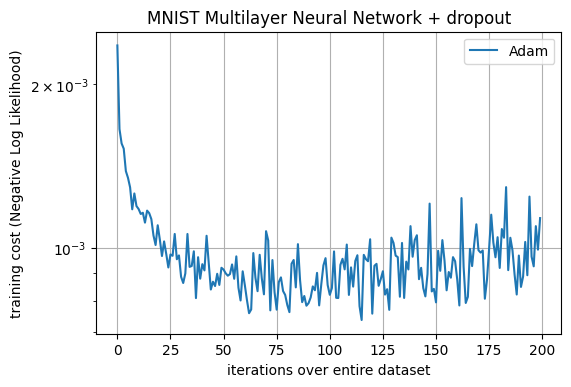

In [ ]:
# Plot the negative log likelihood training cost over iterations
plt.figure(figsize=(6,4), dpi=100)
plt.plot(train_losses_Adam, label='Adam')
plt.grid(True)

plt.title('MNIST Multilayer Neural Network + dropout')
plt.xlabel('iterations over entire dataset')
plt.ylabel('training cost (Negative Log Likelihood)')
plt.yscale('log')
plt.legend()
plt.show()

## Adagrad

In [ ]:
model = Net().to(device)
criterion = torch.nn.NLLLoss()
optimizer = torch.optim.Adagrad(model.parameters(), lr=0.01)

In [ ]:
# Train the model
train_losses_Adagrad = []
train_accs_Adagrad = []
for epoch in tqdm(range(200)): # number of epochs
    running_loss = 0.0
    running_acc = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        running_acc += (predicted == labels).sum().item() / len(labels)
    epoch_loss = running_loss / len(train_dataset)
    epoch_acc = running_acc / len(train_dataset)
    train_losses_Adagrad.append(epoch_loss)
    train_accs_Adagrad.append(epoch_acc)

    print('Epoch %d: Loss=%.6f Acc=%.6f' % (epoch+1, epoch_loss, epoch_acc))


  0%|          | 1/200 [00:10<34:27, 10.39s/it]

Epoch 1: Loss=0.000083 Acc=0.007795


  1%|          | 2/200 [00:18<29:48,  9.03s/it]

Epoch 2: Loss=0.000076 Acc=0.007796


  2%|▏         | 3/200 [00:25<27:17,  8.31s/it]

Epoch 3: Loss=0.000072 Acc=0.007798


  2%|▏         | 4/200 [00:33<26:47,  8.20s/it]

Epoch 4: Loss=0.000071 Acc=0.007798


  2%|▎         | 5/200 [00:41<26:23,  8.12s/it]

Epoch 5: Loss=0.000068 Acc=0.007799


  3%|▎         | 6/200 [00:49<25:21,  7.84s/it]

Epoch 6: Loss=0.000061 Acc=0.007802


  4%|▎         | 7/200 [00:57<25:36,  7.96s/it]

Epoch 7: Loss=0.000059 Acc=0.007802


  4%|▍         | 8/200 [01:05<25:27,  7.96s/it]

Epoch 8: Loss=0.000057 Acc=0.007804


  4%|▍         | 9/200 [01:13<25:03,  7.87s/it]

Epoch 9: Loss=0.000056 Acc=0.007802


  5%|▌         | 10/200 [01:21<25:09,  7.94s/it]

Epoch 10: Loss=0.000059 Acc=0.007799


  6%|▌         | 11/200 [01:28<24:48,  7.88s/it]

Epoch 11: Loss=0.000051 Acc=0.007806


  6%|▌         | 12/200 [01:36<24:30,  7.82s/it]

Epoch 12: Loss=0.000050 Acc=0.007805


  6%|▋         | 13/200 [01:44<24:33,  7.88s/it]

Epoch 13: Loss=0.000046 Acc=0.007807


  7%|▋         | 14/200 [01:52<24:22,  7.86s/it]

Epoch 14: Loss=0.000047 Acc=0.007804


  8%|▊         | 15/200 [02:00<24:14,  7.86s/it]

Epoch 15: Loss=0.000047 Acc=0.007805


  8%|▊         | 16/200 [02:08<24:17,  7.92s/it]

Epoch 16: Loss=0.000048 Acc=0.007804


  8%|▊         | 17/200 [02:15<23:40,  7.76s/it]

Epoch 17: Loss=0.000043 Acc=0.007808


  9%|▉         | 18/200 [02:23<23:51,  7.87s/it]

Epoch 18: Loss=0.000044 Acc=0.007805


 10%|▉         | 19/200 [02:31<23:49,  7.90s/it]

Epoch 19: Loss=0.000037 Acc=0.007810


 10%|█         | 20/200 [02:39<23:14,  7.74s/it]

Epoch 20: Loss=0.000041 Acc=0.007807


 10%|█         | 21/200 [02:47<23:15,  7.80s/it]

Epoch 21: Loss=0.000039 Acc=0.007808


 11%|█         | 22/200 [02:55<23:20,  7.87s/it]

Epoch 22: Loss=0.000038 Acc=0.007808


 12%|█▏        | 23/200 [03:02<22:45,  7.71s/it]

Epoch 23: Loss=0.000036 Acc=0.007808


 12%|█▏        | 24/200 [03:10<22:59,  7.84s/it]

Epoch 24: Loss=0.000038 Acc=0.007807


 12%|█▎        | 25/200 [03:18<23:18,  7.99s/it]

Epoch 25: Loss=0.000035 Acc=0.007810


 13%|█▎        | 26/200 [03:26<22:41,  7.83s/it]

Epoch 26: Loss=0.000035 Acc=0.007808


 14%|█▎        | 27/200 [03:34<22:41,  7.87s/it]

Epoch 27: Loss=0.000034 Acc=0.007809


 14%|█▍        | 28/200 [03:42<22:36,  7.89s/it]

Epoch 28: Loss=0.000030 Acc=0.007811


 14%|█▍        | 29/200 [03:49<22:09,  7.78s/it]

Epoch 29: Loss=0.000031 Acc=0.007810


 15%|█▌        | 30/200 [03:57<22:18,  7.87s/it]

Epoch 30: Loss=0.000032 Acc=0.007809


 16%|█▌        | 31/200 [04:05<22:06,  7.85s/it]

Epoch 31: Loss=0.000031 Acc=0.007810


 16%|█▌        | 32/200 [04:13<21:58,  7.85s/it]

Epoch 32: Loss=0.000028 Acc=0.007810


 16%|█▋        | 33/200 [04:21<22:02,  7.92s/it]

Epoch 33: Loss=0.000031 Acc=0.007808


 17%|█▋        | 34/200 [04:29<21:35,  7.80s/it]

Epoch 34: Loss=0.000031 Acc=0.007809


 18%|█▊        | 35/200 [04:37<21:28,  7.81s/it]

Epoch 35: Loss=0.000026 Acc=0.007811


 18%|█▊        | 36/200 [04:45<21:30,  7.87s/it]

Epoch 36: Loss=0.000027 Acc=0.007810


 18%|█▊        | 37/200 [04:52<20:51,  7.68s/it]

Epoch 37: Loss=0.000028 Acc=0.007811


 19%|█▉        | 38/200 [05:00<20:58,  7.77s/it]

Epoch 38: Loss=0.000028 Acc=0.007810


 20%|█▉        | 39/200 [05:08<21:10,  7.89s/it]

Epoch 39: Loss=0.000026 Acc=0.007811


 20%|██        | 40/200 [05:15<20:42,  7.77s/it]

Epoch 40: Loss=0.000023 Acc=0.007813


 20%|██        | 41/200 [05:23<20:42,  7.81s/it]

Epoch 41: Loss=0.000023 Acc=0.007812


 21%|██        | 42/200 [05:31<20:45,  7.88s/it]

Epoch 42: Loss=0.000026 Acc=0.007811


 22%|██▏       | 43/200 [05:39<20:17,  7.75s/it]

Epoch 43: Loss=0.000025 Acc=0.007811


 22%|██▏       | 44/200 [05:47<20:18,  7.81s/it]

Epoch 44: Loss=0.000023 Acc=0.007811


 22%|██▎       | 45/200 [05:55<20:11,  7.82s/it]

Epoch 45: Loss=0.000023 Acc=0.007812


 23%|██▎       | 46/200 [06:02<19:47,  7.71s/it]

Epoch 46: Loss=0.000022 Acc=0.007812


 24%|██▎       | 47/200 [06:10<19:51,  7.78s/it]

Epoch 47: Loss=0.000024 Acc=0.007810


 24%|██▍       | 48/200 [06:18<19:38,  7.75s/it]

Epoch 48: Loss=0.000020 Acc=0.007813


 24%|██▍       | 49/200 [06:25<19:28,  7.74s/it]

Epoch 49: Loss=0.000022 Acc=0.007812


 25%|██▌       | 50/200 [06:34<19:37,  7.85s/it]

Epoch 50: Loss=0.000022 Acc=0.007811


 26%|██▌       | 51/200 [06:41<19:08,  7.71s/it]

Epoch 51: Loss=0.000021 Acc=0.007813


 26%|██▌       | 52/200 [06:49<19:12,  7.79s/it]

Epoch 52: Loss=0.000021 Acc=0.007813


 26%|██▋       | 53/200 [06:57<19:15,  7.86s/it]

Epoch 53: Loss=0.000021 Acc=0.007813


 27%|██▋       | 54/200 [07:04<18:46,  7.72s/it]

Epoch 54: Loss=0.000021 Acc=0.007812


 28%|██▊       | 55/200 [07:12<18:52,  7.81s/it]

Epoch 55: Loss=0.000022 Acc=0.007812


 28%|██▊       | 56/200 [07:20<18:53,  7.87s/it]

Epoch 56: Loss=0.000021 Acc=0.007812


 28%|██▊       | 57/200 [07:28<18:26,  7.74s/it]

Epoch 57: Loss=0.000020 Acc=0.007813


 29%|██▉       | 58/200 [07:36<18:35,  7.85s/it]

Epoch 58: Loss=0.000019 Acc=0.007813


 30%|██▉       | 59/200 [07:44<18:37,  7.92s/it]

Epoch 59: Loss=0.000017 Acc=0.007813


 30%|███       | 60/200 [07:51<18:11,  7.80s/it]

Epoch 60: Loss=0.000019 Acc=0.007812


 30%|███       | 61/200 [07:59<18:10,  7.85s/it]

Epoch 61: Loss=0.000018 Acc=0.007813


 31%|███       | 62/200 [08:08<18:15,  7.93s/it]

Epoch 62: Loss=0.000018 Acc=0.007813


 32%|███▏      | 63/200 [08:15<17:46,  7.78s/it]

Epoch 63: Loss=0.000019 Acc=0.007812


 32%|███▏      | 64/200 [08:23<17:50,  7.87s/it]

Epoch 64: Loss=0.000019 Acc=0.007812


 32%|███▎      | 65/200 [08:31<17:39,  7.85s/it]

Epoch 65: Loss=0.000017 Acc=0.007814


 33%|███▎      | 66/200 [08:38<17:21,  7.77s/it]

Epoch 66: Loss=0.000019 Acc=0.007812


 34%|███▎      | 67/200 [08:47<17:24,  7.86s/it]

Epoch 67: Loss=0.000016 Acc=0.007814


 34%|███▍      | 68/200 [08:54<17:00,  7.73s/it]

Epoch 68: Loss=0.000018 Acc=0.007813


 34%|███▍      | 69/200 [09:02<16:56,  7.76s/it]

Epoch 69: Loss=0.000020 Acc=0.007812


 35%|███▌      | 70/200 [09:10<17:02,  7.86s/it]

Epoch 70: Loss=0.000016 Acc=0.007814


 36%|███▌      | 71/200 [09:17<16:36,  7.72s/it]

Epoch 71: Loss=0.000016 Acc=0.007813


 36%|███▌      | 72/200 [09:25<16:34,  7.77s/it]

Epoch 72: Loss=0.000017 Acc=0.007813


 36%|███▋      | 73/200 [09:33<16:36,  7.85s/it]

Epoch 73: Loss=0.000015 Acc=0.007814


 37%|███▋      | 74/200 [09:41<16:13,  7.73s/it]

Epoch 74: Loss=0.000014 Acc=0.007814


 38%|███▊      | 75/200 [09:49<16:12,  7.78s/it]

Epoch 75: Loss=0.000013 Acc=0.007815


 38%|███▊      | 76/200 [09:56<16:09,  7.82s/it]

Epoch 76: Loss=0.000016 Acc=0.007813


 38%|███▊      | 77/200 [10:04<15:41,  7.65s/it]

Epoch 77: Loss=0.000016 Acc=0.007812


 39%|███▉      | 78/200 [10:12<15:47,  7.77s/it]

Epoch 78: Loss=0.000014 Acc=0.007814


 40%|███▉      | 79/200 [10:20<15:48,  7.84s/it]

Epoch 79: Loss=0.000014 Acc=0.007814


 40%|████      | 80/200 [10:27<15:22,  7.69s/it]

Epoch 80: Loss=0.000016 Acc=0.007813


 40%|████      | 81/200 [10:35<15:29,  7.81s/it]

Epoch 81: Loss=0.000016 Acc=0.007813


 41%|████      | 82/200 [10:43<15:11,  7.73s/it]

Epoch 82: Loss=0.000014 Acc=0.007814


 42%|████▏     | 83/200 [10:50<14:57,  7.67s/it]

Epoch 83: Loss=0.000013 Acc=0.007815


 42%|████▏     | 84/200 [10:58<14:54,  7.71s/it]

Epoch 84: Loss=0.000015 Acc=0.007813


 42%|████▎     | 85/200 [11:05<14:33,  7.60s/it]

Epoch 85: Loss=0.000012 Acc=0.007815


 43%|████▎     | 86/200 [11:13<14:34,  7.67s/it]

Epoch 86: Loss=0.000013 Acc=0.007814


 44%|████▎     | 87/200 [11:21<14:30,  7.70s/it]

Epoch 87: Loss=0.000015 Acc=0.007813


 44%|████▍     | 88/200 [11:28<14:07,  7.57s/it]

Epoch 88: Loss=0.000012 Acc=0.007815


 44%|████▍     | 89/200 [11:36<14:10,  7.67s/it]

Epoch 89: Loss=0.000012 Acc=0.007815


 45%|████▌     | 90/200 [11:44<14:09,  7.72s/it]

Epoch 90: Loss=0.000013 Acc=0.007813


 46%|████▌     | 91/200 [11:51<13:46,  7.59s/it]

Epoch 91: Loss=0.000012 Acc=0.007815


 46%|████▌     | 92/200 [11:59<13:47,  7.66s/it]

Epoch 92: Loss=0.000014 Acc=0.007814


 46%|████▋     | 93/200 [12:07<13:37,  7.64s/it]

Epoch 93: Loss=0.000016 Acc=0.007813


 47%|████▋     | 94/200 [12:14<13:26,  7.60s/it]

Epoch 94: Loss=0.000011 Acc=0.007815


 48%|████▊     | 95/200 [12:22<13:33,  7.74s/it]

Epoch 95: Loss=0.000011 Acc=0.007815


 48%|████▊     | 96/200 [12:30<13:09,  7.60s/it]

Epoch 96: Loss=0.000013 Acc=0.007814


 48%|████▊     | 97/200 [12:37<13:11,  7.68s/it]

Epoch 97: Loss=0.000012 Acc=0.007814


 49%|████▉     | 98/200 [12:45<13:14,  7.78s/it]

Epoch 98: Loss=0.000012 Acc=0.007814


 50%|████▉     | 99/200 [12:53<12:50,  7.63s/it]

Epoch 99: Loss=0.000011 Acc=0.007815


 50%|█████     | 100/200 [13:01<12:49,  7.70s/it]

Epoch 100: Loss=0.000010 Acc=0.007815


 50%|█████     | 101/200 [13:09<12:52,  7.81s/it]

Epoch 101: Loss=0.000012 Acc=0.007814


 51%|█████     | 102/200 [13:16<12:35,  7.71s/it]

Epoch 102: Loss=0.000012 Acc=0.007814


 52%|█████▏    | 103/200 [13:24<12:29,  7.73s/it]

Epoch 103: Loss=0.000011 Acc=0.007815


 52%|█████▏    | 104/200 [13:31<12:17,  7.69s/it]

Epoch 104: Loss=0.000014 Acc=0.007815


 52%|█████▎    | 105/200 [13:39<12:02,  7.61s/it]

Epoch 105: Loss=0.000010 Acc=0.007815


 53%|█████▎    | 106/200 [13:47<12:04,  7.70s/it]

Epoch 106: Loss=0.000011 Acc=0.007814


 54%|█████▎    | 107/200 [13:54<11:40,  7.53s/it]

Epoch 107: Loss=0.000009 Acc=0.007815


 54%|█████▍    | 108/200 [14:02<11:39,  7.61s/it]

Epoch 108: Loss=0.000011 Acc=0.007814


 55%|█████▍    | 109/200 [14:10<11:42,  7.71s/it]

Epoch 109: Loss=0.000011 Acc=0.007815


 55%|█████▌    | 110/200 [14:17<11:20,  7.56s/it]

Epoch 110: Loss=0.000011 Acc=0.007815


 56%|█████▌    | 111/200 [14:25<11:19,  7.64s/it]

Epoch 111: Loss=0.000011 Acc=0.007814


 56%|█████▌    | 112/200 [14:33<11:18,  7.71s/it]

Epoch 112: Loss=0.000012 Acc=0.007814


 56%|█████▋    | 113/200 [14:40<11:00,  7.59s/it]

Epoch 113: Loss=0.000011 Acc=0.007814


 57%|█████▋    | 114/200 [14:48<10:58,  7.66s/it]

Epoch 114: Loss=0.000012 Acc=0.007814


 57%|█████▊    | 115/200 [14:55<10:47,  7.62s/it]

Epoch 115: Loss=0.000011 Acc=0.007814


 58%|█████▊    | 116/200 [15:03<10:37,  7.59s/it]

Epoch 116: Loss=0.000008 Acc=0.007815


 58%|█████▊    | 117/200 [15:11<10:38,  7.69s/it]

Epoch 117: Loss=0.000011 Acc=0.007815


 59%|█████▉    | 118/200 [15:18<10:18,  7.54s/it]

Epoch 118: Loss=0.000010 Acc=0.007815


 60%|█████▉    | 119/200 [15:26<10:18,  7.63s/it]

Epoch 119: Loss=0.000012 Acc=0.007814


 60%|██████    | 120/200 [15:34<10:17,  7.72s/it]

Epoch 120: Loss=0.000010 Acc=0.007815


 60%|██████    | 121/200 [15:41<10:00,  7.60s/it]

Epoch 121: Loss=0.000009 Acc=0.007815


 61%|██████    | 122/200 [15:49<09:59,  7.69s/it]

Epoch 122: Loss=0.000009 Acc=0.007815


 62%|██████▏   | 123/200 [15:57<09:57,  7.76s/it]

Epoch 123: Loss=0.000009 Acc=0.007815


 62%|██████▏   | 124/200 [16:04<09:35,  7.57s/it]

Epoch 124: Loss=0.000011 Acc=0.007815


 62%|██████▎   | 125/200 [16:12<09:34,  7.66s/it]

Epoch 125: Loss=0.000010 Acc=0.007815


 63%|██████▎   | 126/200 [16:19<09:25,  7.64s/it]

Epoch 126: Loss=0.000009 Acc=0.007815


 64%|██████▎   | 127/200 [16:27<09:13,  7.59s/it]

Epoch 127: Loss=0.000008 Acc=0.007815


 64%|██████▍   | 128/200 [16:35<09:12,  7.67s/it]

Epoch 128: Loss=0.000011 Acc=0.007814


 64%|██████▍   | 129/200 [16:42<08:56,  7.56s/it]

Epoch 129: Loss=0.000010 Acc=0.007814


 65%|██████▌   | 130/200 [16:50<08:55,  7.64s/it]

Epoch 130: Loss=0.000009 Acc=0.007815


 66%|██████▌   | 131/200 [16:58<08:54,  7.74s/it]

Epoch 131: Loss=0.000009 Acc=0.007815


 66%|██████▌   | 132/200 [17:05<08:35,  7.58s/it]

Epoch 132: Loss=0.000009 Acc=0.007815


 66%|██████▋   | 133/200 [17:13<08:35,  7.70s/it]

Epoch 133: Loss=0.000010 Acc=0.007815


 67%|██████▋   | 134/200 [17:21<08:32,  7.77s/it]

Epoch 134: Loss=0.000011 Acc=0.007814


 68%|██████▊   | 135/200 [17:28<08:13,  7.58s/it]

Epoch 135: Loss=0.000009 Acc=0.007814


 68%|██████▊   | 136/200 [17:36<08:11,  7.68s/it]

Epoch 136: Loss=0.000012 Acc=0.007814


 68%|██████▊   | 137/200 [17:44<08:04,  7.68s/it]

Epoch 137: Loss=0.000009 Acc=0.007815


 69%|██████▉   | 138/200 [17:51<07:51,  7.60s/it]

Epoch 138: Loss=0.000009 Acc=0.007815


 70%|██████▉   | 139/200 [17:59<07:47,  7.67s/it]

Epoch 139: Loss=0.000008 Acc=0.007815


 70%|███████   | 140/200 [18:06<07:30,  7.51s/it]

Epoch 140: Loss=0.000009 Acc=0.007815


 70%|███████   | 141/200 [18:14<07:32,  7.67s/it]

Epoch 141: Loss=0.000010 Acc=0.007815


 71%|███████   | 142/200 [18:22<07:27,  7.71s/it]

Epoch 142: Loss=0.000007 Acc=0.007816


 72%|███████▏  | 143/200 [18:29<07:11,  7.57s/it]

Epoch 143: Loss=0.000008 Acc=0.007815


 72%|███████▏  | 144/200 [18:37<07:09,  7.68s/it]

Epoch 144: Loss=0.000009 Acc=0.007815


 72%|███████▎  | 145/200 [18:45<07:07,  7.77s/it]

Epoch 145: Loss=0.000009 Acc=0.007815


 73%|███████▎  | 146/200 [18:52<06:50,  7.60s/it]

Epoch 146: Loss=0.000008 Acc=0.007816


 74%|███████▎  | 147/200 [19:00<06:46,  7.67s/it]

Epoch 147: Loss=0.000008 Acc=0.007815


 74%|███████▍  | 148/200 [19:08<06:38,  7.67s/it]

Epoch 148: Loss=0.000008 Acc=0.007815


 74%|███████▍  | 149/200 [19:15<06:28,  7.61s/it]

Epoch 149: Loss=0.000009 Acc=0.007815


 75%|███████▌  | 150/200 [19:23<06:24,  7.69s/it]

Epoch 150: Loss=0.000009 Acc=0.007815


 76%|███████▌  | 151/200 [19:30<06:09,  7.53s/it]

Epoch 151: Loss=0.000008 Acc=0.007815


 76%|███████▌  | 152/200 [19:38<06:06,  7.64s/it]

Epoch 152: Loss=0.000008 Acc=0.007815


 76%|███████▋  | 153/200 [19:46<06:03,  7.73s/it]

Epoch 153: Loss=0.000007 Acc=0.007815


 77%|███████▋  | 154/200 [19:53<05:48,  7.59s/it]

Epoch 154: Loss=0.000007 Acc=0.007815


 78%|███████▊  | 155/200 [20:01<05:46,  7.69s/it]

Epoch 155: Loss=0.000007 Acc=0.007816


 78%|███████▊  | 156/200 [20:09<05:39,  7.71s/it]

Epoch 156: Loss=0.000008 Acc=0.007815


 78%|███████▊  | 157/200 [20:16<05:26,  7.59s/it]

Epoch 157: Loss=0.000008 Acc=0.007815


 79%|███████▉  | 158/200 [20:24<05:21,  7.66s/it]

Epoch 158: Loss=0.000008 Acc=0.007815


 80%|███████▉  | 159/200 [20:32<05:14,  7.66s/it]

Epoch 159: Loss=0.000007 Acc=0.007816


 80%|████████  | 160/200 [20:39<05:04,  7.61s/it]

Epoch 160: Loss=0.000007 Acc=0.007815


 80%|████████  | 161/200 [20:47<05:01,  7.73s/it]

Epoch 161: Loss=0.000008 Acc=0.007815


 81%|████████  | 162/200 [20:55<04:48,  7.58s/it]

Epoch 162: Loss=0.000008 Acc=0.007815


 82%|████████▏ | 163/200 [21:02<04:42,  7.64s/it]

Epoch 163: Loss=0.000007 Acc=0.007815


 82%|████████▏ | 164/200 [21:10<04:38,  7.73s/it]

Epoch 164: Loss=0.000008 Acc=0.007815


 82%|████████▎ | 165/200 [21:18<04:25,  7.60s/it]

Epoch 165: Loss=0.000008 Acc=0.007815


 83%|████████▎ | 166/200 [21:26<04:21,  7.70s/it]

Epoch 166: Loss=0.000009 Acc=0.007815


 84%|████████▎ | 167/200 [21:33<04:14,  7.72s/it]

Epoch 167: Loss=0.000009 Acc=0.007814


 84%|████████▍ | 168/200 [21:40<04:01,  7.56s/it]

Epoch 168: Loss=0.000008 Acc=0.007815


 84%|████████▍ | 169/200 [21:48<03:57,  7.67s/it]

Epoch 169: Loss=0.000006 Acc=0.007816


 85%|████████▌ | 170/200 [21:56<03:49,  7.64s/it]

Epoch 170: Loss=0.000009 Acc=0.007814


 86%|████████▌ | 171/200 [22:03<03:39,  7.55s/it]

Epoch 171: Loss=0.000007 Acc=0.007815


 86%|████████▌ | 172/200 [22:11<03:33,  7.63s/it]

Epoch 172: Loss=0.000009 Acc=0.007814


 86%|████████▋ | 173/200 [22:18<03:23,  7.53s/it]

Epoch 173: Loss=0.000007 Acc=0.007815


 87%|████████▋ | 174/200 [22:26<03:18,  7.63s/it]

Epoch 174: Loss=0.000008 Acc=0.007815


 88%|████████▊ | 175/200 [22:34<03:12,  7.72s/it]

Epoch 175: Loss=0.000007 Acc=0.007816


 88%|████████▊ | 176/200 [22:42<03:02,  7.61s/it]

Epoch 176: Loss=0.000006 Acc=0.007816


 88%|████████▊ | 177/200 [22:49<02:56,  7.69s/it]

Epoch 177: Loss=0.000007 Acc=0.007816


 89%|████████▉ | 178/200 [22:57<02:49,  7.72s/it]

Epoch 178: Loss=0.000007 Acc=0.007815


 90%|████████▉ | 179/200 [23:04<02:38,  7.56s/it]

Epoch 179: Loss=0.000008 Acc=0.007815


 90%|█████████ | 180/200 [23:12<02:33,  7.66s/it]

Epoch 180: Loss=0.000007 Acc=0.007815


 90%|█████████ | 181/200 [23:20<02:25,  7.65s/it]

Epoch 181: Loss=0.000008 Acc=0.007815


 91%|█████████ | 182/200 [23:27<02:16,  7.58s/it]

Epoch 182: Loss=0.000006 Acc=0.007816


 92%|█████████▏| 183/200 [23:35<02:10,  7.66s/it]

Epoch 183: Loss=0.000006 Acc=0.007816


 92%|█████████▏| 184/200 [23:42<02:00,  7.53s/it]

Epoch 184: Loss=0.000007 Acc=0.007815


 92%|█████████▎| 185/200 [23:50<01:54,  7.64s/it]

Epoch 185: Loss=0.000008 Acc=0.007815


 93%|█████████▎| 186/200 [23:58<01:48,  7.74s/it]

Epoch 186: Loss=0.000006 Acc=0.007816


 94%|█████████▎| 187/200 [24:06<01:38,  7.59s/it]

Epoch 187: Loss=0.000007 Acc=0.007815


 94%|█████████▍| 188/200 [24:13<01:32,  7.67s/it]

Epoch 188: Loss=0.000007 Acc=0.007815


 94%|█████████▍| 189/200 [24:21<01:25,  7.76s/it]

Epoch 189: Loss=0.000006 Acc=0.007815


 95%|█████████▌| 190/200 [24:29<01:16,  7.63s/it]

Epoch 190: Loss=0.000008 Acc=0.007815


 96%|█████████▌| 191/200 [24:37<01:09,  7.69s/it]

Epoch 191: Loss=0.000007 Acc=0.007816


 96%|█████████▌| 192/200 [24:44<01:01,  7.64s/it]

Epoch 192: Loss=0.000006 Acc=0.007816


 96%|█████████▋| 193/200 [24:52<00:53,  7.60s/it]

Epoch 193: Loss=0.000007 Acc=0.007815


 97%|█████████▋| 194/200 [25:00<00:46,  7.70s/it]

Epoch 194: Loss=0.000008 Acc=0.007815


 98%|█████████▊| 195/200 [25:07<00:37,  7.57s/it]

Epoch 195: Loss=0.000006 Acc=0.007816


 98%|█████████▊| 196/200 [25:15<00:30,  7.69s/it]

Epoch 196: Loss=0.000006 Acc=0.007816


 98%|█████████▊| 197/200 [25:23<00:23,  7.82s/it]

Epoch 197: Loss=0.000007 Acc=0.007815


 99%|█████████▉| 198/200 [25:30<00:15,  7.64s/it]

Epoch 198: Loss=0.000005 Acc=0.007816


100%|█████████▉| 199/200 [25:38<00:07,  7.69s/it]

Epoch 199: Loss=0.000006 Acc=0.007815


100%|██████████| 200/200 [25:46<00:00,  7.73s/it]

Epoch 200: Loss=0.000006 Acc=0.007816


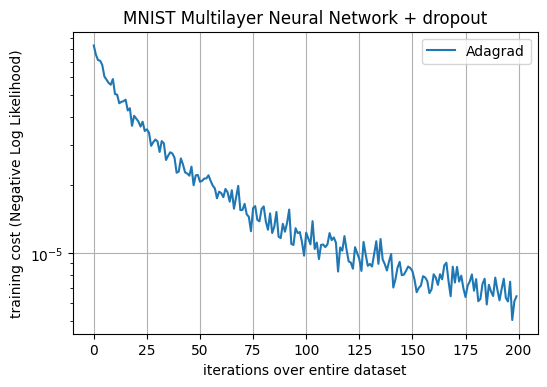

In [ ]:
# Plot the negative log likelihood training cost over iterations
plt.figure(figsize=(6,4), dpi=100)
plt.plot(train_losses_Adagrad, label='Adagrad')
plt.grid(True)

plt.title('MNIST Multilayer Neural Network + dropout')
plt.xlabel('iterations over entire dataset')
plt.ylabel('training cost (Negative Log Likelihood)')
plt.yscale('log')
plt.legend()
plt.show()

## Adadelta

In [ ]:
model = Net().to(device)
criterion = torch.nn.NLLLoss()
optimizer = torch.optim.Adadelta(model.parameters(), lr=0.01)

In [ ]:
# Train the model
train_losses_Adadelta = []
train_accs_Adadelta = []
for epoch in tqdm(range(200)): # number of epochs
    running_loss = 0.0
    running_acc = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        running_acc += (predicted == labels).sum().item() / len(labels)
    epoch_loss = running_loss / len(train_dataset)
    epoch_acc = running_acc / len(train_dataset)
    train_losses_Adadelta.append(epoch_loss)
    train_accs_Adadelta.append(epoch_acc)

    print('Epoch %d: Loss=%.6f Acc=%.6f' % (epoch+1, epoch_loss, epoch_acc))


  0%|          | 1/200 [00:07<25:05,  7.56s/it]

Epoch 1: Loss=0.016930 Acc=0.003626


  1%|          | 2/200 [00:15<25:52,  7.84s/it]

Epoch 2: Loss=0.011598 Acc=0.005509


  2%|▏         | 3/200 [00:23<26:00,  7.92s/it]

Epoch 3: Loss=0.006889 Acc=0.006102


  2%|▏         | 4/200 [00:31<25:13,  7.72s/it]

Epoch 4: Loss=0.005169 Acc=0.006416


  2%|▎         | 5/200 [00:39<25:33,  7.86s/it]

Epoch 5: Loss=0.004353 Acc=0.006603


  3%|▎         | 6/200 [00:47<25:45,  7.96s/it]

Epoch 6: Loss=0.003888 Acc=0.006716


  4%|▎         | 7/200 [00:54<25:13,  7.84s/it]

Epoch 7: Loss=0.003570 Acc=0.006794


  4%|▍         | 8/200 [01:03<25:25,  7.95s/it]

Epoch 8: Loss=0.003355 Acc=0.006850


  4%|▍         | 9/200 [01:11<25:30,  8.01s/it]

Epoch 9: Loss=0.003181 Acc=0.006905


  5%|▌         | 10/200 [01:18<24:43,  7.81s/it]

Epoch 10: Loss=0.003055 Acc=0.006939


  6%|▌         | 11/200 [01:26<24:53,  7.90s/it]

Epoch 11: Loss=0.002934 Acc=0.006974


  6%|▌         | 12/200 [01:34<24:56,  7.96s/it]

Epoch 12: Loss=0.002829 Acc=0.007001


  6%|▋         | 13/200 [01:42<24:29,  7.86s/it]

Epoch 13: Loss=0.002739 Acc=0.007025


  7%|▋         | 14/200 [01:50<24:27,  7.89s/it]

Epoch 14: Loss=0.002653 Acc=0.007052


  8%|▊         | 15/200 [01:58<24:32,  7.96s/it]

Epoch 15: Loss=0.002576 Acc=0.007079


  8%|▊         | 16/200 [02:05<23:54,  7.80s/it]

Epoch 16: Loss=0.002518 Acc=0.007093


  8%|▊         | 17/200 [02:14<24:05,  7.90s/it]

Epoch 17: Loss=0.002447 Acc=0.007108


  9%|▉         | 18/200 [02:21<23:53,  7.87s/it]

Epoch 18: Loss=0.002376 Acc=0.007121


 10%|▉         | 19/200 [02:29<23:29,  7.79s/it]

Epoch 19: Loss=0.002336 Acc=0.007146


 10%|█         | 20/200 [02:37<23:37,  7.88s/it]

Epoch 20: Loss=0.002276 Acc=0.007160


 10%|█         | 21/200 [02:45<23:15,  7.79s/it]

Epoch 21: Loss=0.002216 Acc=0.007177


 11%|█         | 22/200 [02:53<23:16,  7.84s/it]

Epoch 22: Loss=0.002158 Acc=0.007195


 12%|█▏        | 23/200 [03:01<23:15,  7.89s/it]

Epoch 23: Loss=0.002112 Acc=0.007205


 12%|█▏        | 24/200 [03:08<22:36,  7.71s/it]

Epoch 24: Loss=0.002066 Acc=0.007222


 12%|█▎        | 25/200 [03:16<22:52,  7.84s/it]

Epoch 25: Loss=0.002032 Acc=0.007233


 13%|█▎        | 26/200 [03:24<22:52,  7.89s/it]

Epoch 26: Loss=0.001974 Acc=0.007243


 14%|█▎        | 27/200 [03:31<22:20,  7.75s/it]

Epoch 27: Loss=0.001936 Acc=0.007253


 14%|█▍        | 28/200 [03:40<22:34,  7.87s/it]

Epoch 28: Loss=0.001896 Acc=0.007276


 14%|█▍        | 29/200 [03:48<22:36,  7.93s/it]

Epoch 29: Loss=0.001855 Acc=0.007280


 15%|█▌        | 30/200 [03:55<22:00,  7.77s/it]

Epoch 30: Loss=0.001813 Acc=0.007296


 16%|█▌        | 31/200 [04:03<22:05,  7.84s/it]

Epoch 31: Loss=0.001786 Acc=0.007300


 16%|█▌        | 32/200 [04:11<22:12,  7.93s/it]

Epoch 32: Loss=0.001758 Acc=0.007310


 16%|█▋        | 33/200 [04:19<21:34,  7.75s/it]

Epoch 33: Loss=0.001726 Acc=0.007321


 17%|█▋        | 34/200 [04:27<21:39,  7.83s/it]

Epoch 34: Loss=0.001681 Acc=0.007334


 18%|█▊        | 35/200 [04:35<21:42,  7.89s/it]

Epoch 35: Loss=0.001646 Acc=0.007344


 18%|█▊        | 36/200 [04:42<21:18,  7.80s/it]

Epoch 36: Loss=0.001612 Acc=0.007351


 18%|█▊        | 37/200 [04:50<21:27,  7.90s/it]

Epoch 37: Loss=0.001590 Acc=0.007358


 19%|█▉        | 38/200 [04:58<21:26,  7.94s/it]

Epoch 38: Loss=0.001573 Acc=0.007366


 20%|█▉        | 39/200 [05:06<20:58,  7.82s/it]

Epoch 39: Loss=0.001528 Acc=0.007377


 20%|██        | 40/200 [05:14<21:02,  7.89s/it]

Epoch 40: Loss=0.001526 Acc=0.007382


 20%|██        | 41/200 [05:22<20:51,  7.87s/it]

Epoch 41: Loss=0.001485 Acc=0.007391


 21%|██        | 42/200 [05:29<20:34,  7.82s/it]

Epoch 42: Loss=0.001457 Acc=0.007394


 22%|██▏       | 43/200 [05:37<20:37,  7.88s/it]

Epoch 43: Loss=0.001429 Acc=0.007411


 22%|██▏       | 44/200 [05:45<20:21,  7.83s/it]

Epoch 44: Loss=0.001411 Acc=0.007409


 22%|██▎       | 45/200 [05:53<20:14,  7.83s/it]

Epoch 45: Loss=0.001390 Acc=0.007412


 23%|██▎       | 46/200 [06:01<20:18,  7.91s/it]

Epoch 46: Loss=0.001363 Acc=0.007426


 24%|██▎       | 47/200 [06:09<19:47,  7.76s/it]

Epoch 47: Loss=0.001346 Acc=0.007428


 24%|██▍       | 48/200 [06:17<19:58,  7.88s/it]

Epoch 48: Loss=0.001320 Acc=0.007434


 24%|██▍       | 49/200 [06:25<19:55,  7.92s/it]

Epoch 49: Loss=0.001304 Acc=0.007437


 25%|██▌       | 50/200 [06:32<19:26,  7.77s/it]

Epoch 50: Loss=0.001276 Acc=0.007448


 26%|██▌       | 51/200 [06:40<19:26,  7.83s/it]

Epoch 51: Loss=0.001261 Acc=0.007451


 26%|██▌       | 52/200 [06:48<19:30,  7.91s/it]

Epoch 52: Loss=0.001235 Acc=0.007456


 26%|██▋       | 53/200 [06:56<19:04,  7.78s/it]

Epoch 53: Loss=0.001238 Acc=0.007457


 27%|██▋       | 54/200 [07:04<19:05,  7.85s/it]

Epoch 54: Loss=0.001208 Acc=0.007468


 28%|██▊       | 55/200 [07:12<19:05,  7.90s/it]

Epoch 55: Loss=0.001191 Acc=0.007471


 28%|██▊       | 56/200 [07:19<18:39,  7.77s/it]

Epoch 56: Loss=0.001183 Acc=0.007470


 28%|██▊       | 57/200 [07:27<18:45,  7.87s/it]

Epoch 57: Loss=0.001152 Acc=0.007482


 29%|██▉       | 58/200 [07:36<18:53,  7.98s/it]

Epoch 58: Loss=0.001146 Acc=0.007487


 30%|██▉       | 59/200 [07:43<18:23,  7.82s/it]

Epoch 59: Loss=0.001123 Acc=0.007495


 30%|███       | 60/200 [07:51<18:30,  7.93s/it]

Epoch 60: Loss=0.001107 Acc=0.007497


 30%|███       | 61/200 [07:59<18:25,  7.95s/it]

Epoch 61: Loss=0.001096 Acc=0.007502


 31%|███       | 62/200 [08:06<17:49,  7.75s/it]

Epoch 62: Loss=0.001089 Acc=0.007505


 32%|███▏      | 63/200 [08:14<17:50,  7.81s/it]

Epoch 63: Loss=0.001066 Acc=0.007510


 32%|███▏      | 64/200 [08:22<17:41,  7.80s/it]

Epoch 64: Loss=0.001058 Acc=0.007509


 32%|███▎      | 65/200 [08:30<17:21,  7.72s/it]

Epoch 65: Loss=0.001044 Acc=0.007519


 33%|███▎      | 66/200 [08:38<17:24,  7.80s/it]

Epoch 66: Loss=0.001020 Acc=0.007518


 34%|███▎      | 67/200 [08:45<17:01,  7.68s/it]

Epoch 67: Loss=0.001019 Acc=0.007520


 34%|███▍      | 68/200 [08:53<17:09,  7.80s/it]

Epoch 68: Loss=0.001004 Acc=0.007525


 34%|███▍      | 69/200 [09:01<17:08,  7.85s/it]

Epoch 69: Loss=0.000995 Acc=0.007528


 35%|███▌      | 70/200 [09:08<16:39,  7.69s/it]

Epoch 70: Loss=0.000976 Acc=0.007531


 36%|███▌      | 71/200 [09:16<16:44,  7.79s/it]

Epoch 71: Loss=0.000964 Acc=0.007532


 36%|███▌      | 72/200 [09:24<16:43,  7.84s/it]

Epoch 72: Loss=0.000961 Acc=0.007536


 36%|███▋      | 73/200 [09:32<16:15,  7.68s/it]

Epoch 73: Loss=0.000938 Acc=0.007541


 37%|███▋      | 74/200 [09:40<16:19,  7.78s/it]

Epoch 74: Loss=0.000936 Acc=0.007547


 38%|███▊      | 75/200 [09:48<16:19,  7.84s/it]

Epoch 75: Loss=0.000924 Acc=0.007548


 38%|███▊      | 76/200 [09:55<15:55,  7.71s/it]

Epoch 76: Loss=0.000909 Acc=0.007556


 38%|███▊      | 77/200 [10:03<15:57,  7.79s/it]

Epoch 77: Loss=0.000888 Acc=0.007561


 39%|███▉      | 78/200 [10:11<15:57,  7.85s/it]

Epoch 78: Loss=0.000888 Acc=0.007561


 40%|███▉      | 79/200 [10:19<15:35,  7.73s/it]

Epoch 79: Loss=0.000882 Acc=0.007559


 40%|████      | 80/200 [10:27<15:40,  7.84s/it]

Epoch 80: Loss=0.000871 Acc=0.007564


 40%|████      | 81/200 [10:34<15:30,  7.82s/it]

Epoch 81: Loss=0.000864 Acc=0.007567


 41%|████      | 82/200 [10:42<15:11,  7.73s/it]

Epoch 82: Loss=0.000854 Acc=0.007567


 42%|████▏     | 83/200 [10:50<15:13,  7.81s/it]

Epoch 83: Loss=0.000844 Acc=0.007578


 42%|████▏     | 84/200 [10:57<14:50,  7.67s/it]

Epoch 84: Loss=0.000833 Acc=0.007576


 42%|████▎     | 85/200 [11:05<14:52,  7.76s/it]

Epoch 85: Loss=0.000826 Acc=0.007576


 43%|████▎     | 86/200 [11:13<14:50,  7.82s/it]

Epoch 86: Loss=0.000820 Acc=0.007575


 44%|████▎     | 87/200 [11:21<14:29,  7.69s/it]

Epoch 87: Loss=0.000800 Acc=0.007583


 44%|████▍     | 88/200 [11:29<14:32,  7.79s/it]

Epoch 88: Loss=0.000801 Acc=0.007589


 44%|████▍     | 89/200 [11:37<14:32,  7.86s/it]

Epoch 89: Loss=0.000780 Acc=0.007591


 45%|████▌     | 90/200 [11:44<14:08,  7.71s/it]

Epoch 90: Loss=0.000784 Acc=0.007592


 46%|████▌     | 91/200 [11:52<14:10,  7.80s/it]

Epoch 91: Loss=0.000759 Acc=0.007599


 46%|████▌     | 92/200 [12:00<14:11,  7.88s/it]

Epoch 92: Loss=0.000761 Acc=0.007592


 46%|████▋     | 93/200 [12:07<13:42,  7.69s/it]

Epoch 93: Loss=0.000770 Acc=0.007597


 47%|████▋     | 94/200 [12:15<13:43,  7.77s/it]

Epoch 94: Loss=0.000746 Acc=0.007600


 48%|████▊     | 95/200 [12:23<13:46,  7.88s/it]

Epoch 95: Loss=0.000746 Acc=0.007599


 48%|████▊     | 96/200 [12:31<13:19,  7.69s/it]

Epoch 96: Loss=0.000740 Acc=0.007599


 48%|████▊     | 97/200 [12:39<13:18,  7.75s/it]

Epoch 97: Loss=0.000733 Acc=0.007603


 49%|████▉     | 98/200 [12:46<13:06,  7.71s/it]

Epoch 98: Loss=0.000722 Acc=0.007608


 50%|████▉     | 99/200 [12:54<13:08,  7.81s/it]

Epoch 99: Loss=0.000718 Acc=0.007605


 50%|█████     | 100/200 [13:02<13:09,  7.89s/it]

Epoch 100: Loss=0.000712 Acc=0.007604


 50%|█████     | 101/200 [13:10<13:04,  7.93s/it]

Epoch 101: Loss=0.000701 Acc=0.007614


 51%|█████     | 102/200 [13:18<12:59,  7.96s/it]

Epoch 102: Loss=0.000699 Acc=0.007612


 52%|█████▏    | 103/200 [13:26<12:57,  8.01s/it]

Epoch 103: Loss=0.000681 Acc=0.007623


 52%|█████▏    | 104/200 [13:34<12:39,  7.92s/it]

Epoch 104: Loss=0.000683 Acc=0.007623


 52%|█████▎    | 105/200 [13:42<12:32,  7.93s/it]

Epoch 105: Loss=0.000673 Acc=0.007620


 53%|█████▎    | 106/200 [13:50<12:31,  7.99s/it]

Epoch 106: Loss=0.000675 Acc=0.007618


 54%|█████▎    | 107/200 [13:58<12:05,  7.81s/it]

Epoch 107: Loss=0.000663 Acc=0.007625


 54%|█████▍    | 108/200 [14:06<12:05,  7.89s/it]

Epoch 108: Loss=0.000658 Acc=0.007621


 55%|█████▍    | 109/200 [14:14<12:03,  7.95s/it]

Epoch 109: Loss=0.000647 Acc=0.007630


 55%|█████▌    | 110/200 [14:21<11:42,  7.80s/it]

Epoch 110: Loss=0.000650 Acc=0.007626


 56%|█████▌    | 111/200 [14:29<11:39,  7.86s/it]

Epoch 111: Loss=0.000639 Acc=0.007628


 56%|█████▌    | 112/200 [14:37<11:35,  7.91s/it]

Epoch 112: Loss=0.000631 Acc=0.007634


 56%|█████▋    | 113/200 [14:45<11:15,  7.77s/it]

Epoch 113: Loss=0.000628 Acc=0.007633


 57%|█████▋    | 114/200 [14:53<11:15,  7.86s/it]

Epoch 114: Loss=0.000615 Acc=0.007636


 57%|█████▊    | 115/200 [15:01<11:10,  7.89s/it]

Epoch 115: Loss=0.000620 Acc=0.007637


 58%|█████▊    | 116/200 [15:08<10:51,  7.76s/it]

Epoch 116: Loss=0.000615 Acc=0.007640


 58%|█████▊    | 117/200 [15:16<10:48,  7.81s/it]

Epoch 117: Loss=0.000610 Acc=0.007643


 59%|█████▉    | 118/200 [15:24<10:47,  7.90s/it]

Epoch 118: Loss=0.000597 Acc=0.007639


 60%|█████▉    | 119/200 [15:32<10:27,  7.75s/it]

Epoch 119: Loss=0.000600 Acc=0.007641


 60%|██████    | 120/200 [15:40<10:30,  7.88s/it]

Epoch 120: Loss=0.000595 Acc=0.007641


 60%|██████    | 121/200 [15:48<10:24,  7.91s/it]

Epoch 121: Loss=0.000589 Acc=0.007648


 61%|██████    | 122/200 [15:55<10:07,  7.79s/it]

Epoch 122: Loss=0.000578 Acc=0.007651


 62%|██████▏   | 123/200 [16:03<10:06,  7.88s/it]

Epoch 123: Loss=0.000574 Acc=0.007651


 62%|██████▏   | 124/200 [16:11<09:55,  7.84s/it]

Epoch 124: Loss=0.000571 Acc=0.007649


 62%|██████▎   | 125/200 [16:19<09:41,  7.75s/it]

Epoch 125: Loss=0.000565 Acc=0.007652


 63%|██████▎   | 126/200 [16:27<09:39,  7.83s/it]

Epoch 126: Loss=0.000562 Acc=0.007652


 64%|██████▎   | 127/200 [16:34<09:23,  7.72s/it]

Epoch 127: Loss=0.000564 Acc=0.007654


 64%|██████▍   | 128/200 [16:42<09:19,  7.78s/it]

Epoch 128: Loss=0.000553 Acc=0.007654


 64%|██████▍   | 129/200 [16:50<09:16,  7.84s/it]

Epoch 129: Loss=0.000545 Acc=0.007661


 65%|██████▌   | 130/200 [16:58<09:06,  7.80s/it]

Epoch 130: Loss=0.000532 Acc=0.007665


 66%|██████▌   | 131/200 [17:06<09:03,  7.88s/it]

Epoch 131: Loss=0.000542 Acc=0.007653


 66%|██████▌   | 132/200 [17:14<08:57,  7.91s/it]

Epoch 132: Loss=0.000534 Acc=0.007662


 66%|██████▋   | 133/200 [17:21<08:43,  7.81s/it]

Epoch 133: Loss=0.000534 Acc=0.007662


 67%|██████▋   | 134/200 [17:30<08:49,  8.03s/it]

Epoch 134: Loss=0.000524 Acc=0.007661


 68%|██████▊   | 135/200 [17:38<08:46,  8.10s/it]

Epoch 135: Loss=0.000524 Acc=0.007667


 68%|██████▊   | 136/200 [17:46<08:24,  7.89s/it]

Epoch 136: Loss=0.000521 Acc=0.007664


 68%|██████▊   | 137/200 [17:54<08:24,  8.01s/it]

Epoch 137: Loss=0.000523 Acc=0.007663


 69%|██████▉   | 138/200 [18:02<08:20,  8.07s/it]

Epoch 138: Loss=0.000519 Acc=0.007663


 70%|██████▉   | 139/200 [18:10<08:03,  7.92s/it]

Epoch 139: Loss=0.000508 Acc=0.007668


 70%|███████   | 140/200 [18:18<08:08,  8.14s/it]

Epoch 140: Loss=0.000505 Acc=0.007668


 70%|███████   | 141/200 [18:27<08:07,  8.26s/it]

Epoch 141: Loss=0.000496 Acc=0.007668


 71%|███████   | 142/200 [18:35<07:49,  8.09s/it]

Epoch 142: Loss=0.000498 Acc=0.007670


 72%|███████▏  | 143/200 [18:43<07:44,  8.14s/it]

Epoch 143: Loss=0.000491 Acc=0.007674


 72%|███████▏  | 144/200 [18:51<07:38,  8.18s/it]

Epoch 144: Loss=0.000484 Acc=0.007676


 72%|███████▎  | 145/200 [18:59<07:20,  8.00s/it]

Epoch 145: Loss=0.000485 Acc=0.007678


 73%|███████▎  | 146/200 [19:07<07:14,  8.04s/it]

Epoch 146: Loss=0.000476 Acc=0.007681


 74%|███████▎  | 147/200 [19:15<07:11,  8.14s/it]

Epoch 147: Loss=0.000479 Acc=0.007677


 74%|███████▍  | 148/200 [19:23<06:59,  8.08s/it]

Epoch 148: Loss=0.000480 Acc=0.007677


 74%|███████▍  | 149/200 [19:31<06:55,  8.15s/it]

Epoch 149: Loss=0.000474 Acc=0.007681


 75%|███████▌  | 150/200 [19:40<06:51,  8.23s/it]

Epoch 150: Loss=0.000465 Acc=0.007681


 76%|███████▌  | 151/200 [19:48<06:38,  8.12s/it]

Epoch 151: Loss=0.000463 Acc=0.007684


 76%|███████▌  | 152/200 [19:56<06:27,  8.08s/it]

Epoch 152: Loss=0.000473 Acc=0.007678


 76%|███████▋  | 153/200 [20:04<06:20,  8.11s/it]

Epoch 153: Loss=0.000462 Acc=0.007683


 77%|███████▋  | 154/200 [20:12<06:07,  7.99s/it]

Epoch 154: Loss=0.000452 Acc=0.007683


 78%|███████▊  | 155/200 [20:20<06:01,  8.03s/it]

Epoch 155: Loss=0.000457 Acc=0.007683


 78%|███████▊  | 156/200 [20:28<05:56,  8.10s/it]

Epoch 156: Loss=0.000451 Acc=0.007681


 78%|███████▊  | 157/200 [20:36<05:45,  8.05s/it]

Epoch 157: Loss=0.000448 Acc=0.007689


 79%|███████▉  | 158/200 [20:44<05:40,  8.10s/it]

Epoch 158: Loss=0.000440 Acc=0.007686


 80%|███████▉  | 159/200 [20:52<05:35,  8.18s/it]

Epoch 159: Loss=0.000438 Acc=0.007688


 80%|████████  | 160/200 [21:01<05:26,  8.15s/it]

Epoch 160: Loss=0.000430 Acc=0.007693


 80%|████████  | 161/200 [21:08<05:13,  8.05s/it]

Epoch 161: Loss=0.000427 Acc=0.007688


 81%|████████  | 162/200 [21:17<05:09,  8.15s/it]

Epoch 162: Loss=0.000432 Acc=0.007690


 82%|████████▏ | 163/200 [21:25<05:00,  8.13s/it]

Epoch 163: Loss=0.000416 Acc=0.007696


 82%|████████▏ | 164/200 [21:33<04:50,  8.07s/it]

Epoch 164: Loss=0.000424 Acc=0.007692


 82%|████████▎ | 165/200 [21:41<04:45,  8.15s/it]

Epoch 165: Loss=0.000421 Acc=0.007692


 83%|████████▎ | 166/200 [21:49<04:36,  8.12s/it]

Epoch 166: Loss=0.000418 Acc=0.007693


 84%|████████▎ | 167/200 [21:57<04:25,  8.06s/it]

Epoch 167: Loss=0.000412 Acc=0.007695


 84%|████████▍ | 168/200 [22:05<04:19,  8.12s/it]

Epoch 168: Loss=0.000413 Acc=0.007696


 84%|████████▍ | 169/200 [22:14<04:14,  8.21s/it]

Epoch 169: Loss=0.000406 Acc=0.007698


 85%|████████▌ | 170/200 [22:21<04:00,  8.03s/it]

Epoch 170: Loss=0.000401 Acc=0.007699


 86%|████████▌ | 171/200 [22:30<03:55,  8.11s/it]

Epoch 171: Loss=0.000403 Acc=0.007702


 86%|████████▌ | 172/200 [22:38<03:48,  8.18s/it]

Epoch 172: Loss=0.000404 Acc=0.007700


 86%|████████▋ | 173/200 [22:45<03:34,  7.94s/it]

Epoch 173: Loss=0.000394 Acc=0.007701


 87%|████████▋ | 174/200 [22:54<03:28,  8.01s/it]

Epoch 174: Loss=0.000393 Acc=0.007703


 88%|████████▊ | 175/200 [23:01<03:18,  7.95s/it]

Epoch 175: Loss=0.000398 Acc=0.007699


 88%|████████▊ | 176/200 [23:09<03:09,  7.90s/it]

Epoch 176: Loss=0.000382 Acc=0.007705


 88%|████████▊ | 177/200 [23:17<03:03,  7.98s/it]

Epoch 177: Loss=0.000391 Acc=0.007703


 89%|████████▉ | 178/200 [23:25<02:55,  7.97s/it]

Epoch 178: Loss=0.000387 Acc=0.007701


 90%|████████▉ | 179/200 [23:33<02:46,  7.94s/it]

Epoch 179: Loss=0.000380 Acc=0.007706


 90%|█████████ | 180/200 [23:41<02:40,  8.03s/it]

Epoch 180: Loss=0.000384 Acc=0.007705


 90%|█████████ | 181/200 [23:49<02:32,  8.02s/it]

Epoch 181: Loss=0.000385 Acc=0.007703


 91%|█████████ | 182/200 [23:57<02:24,  8.00s/it]

Epoch 182: Loss=0.000370 Acc=0.007706


 92%|█████████▏| 183/200 [24:06<02:17,  8.10s/it]

Epoch 183: Loss=0.000374 Acc=0.007709


 92%|█████████▏| 184/200 [24:13<02:08,  8.00s/it]

Epoch 184: Loss=0.000374 Acc=0.007707


 92%|█████████▎| 185/200 [24:21<01:59,  7.94s/it]

Epoch 185: Loss=0.000372 Acc=0.007708


 93%|█████████▎| 186/200 [24:29<01:52,  8.04s/it]

Epoch 186: Loss=0.000362 Acc=0.007712


 94%|█████████▎| 187/200 [24:37<01:43,  7.96s/it]

Epoch 187: Loss=0.000367 Acc=0.007709


 94%|█████████▍| 188/200 [24:45<01:34,  7.91s/it]

Epoch 188: Loss=0.000364 Acc=0.007710


 94%|█████████▍| 189/200 [24:53<01:27,  7.98s/it]

Epoch 189: Loss=0.000360 Acc=0.007712


 95%|█████████▌| 190/200 [25:01<01:19,  7.90s/it]

Epoch 190: Loss=0.000349 Acc=0.007713


 96%|█████████▌| 191/200 [25:09<01:11,  7.94s/it]

Epoch 191: Loss=0.000360 Acc=0.007713


 96%|█████████▌| 192/200 [25:17<01:03,  7.98s/it]

Epoch 192: Loss=0.000356 Acc=0.007711


 96%|█████████▋| 193/200 [25:25<00:55,  7.86s/it]

Epoch 193: Loss=0.000347 Acc=0.007714


 97%|█████████▋| 194/200 [25:33<00:47,  7.92s/it]

Epoch 194: Loss=0.000342 Acc=0.007720


 98%|█████████▊| 195/200 [25:41<00:40,  8.02s/it]

Epoch 195: Loss=0.000342 Acc=0.007716


 98%|█████████▊| 196/200 [25:48<00:31,  7.86s/it]

Epoch 196: Loss=0.000340 Acc=0.007720


 98%|█████████▊| 197/200 [25:57<00:24,  8.01s/it]

Epoch 197: Loss=0.000339 Acc=0.007722


 99%|█████████▉| 198/200 [26:05<00:16,  8.08s/it]

Epoch 198: Loss=0.000334 Acc=0.007722


100%|█████████▉| 199/200 [26:13<00:07,  7.94s/it]

Epoch 199: Loss=0.000329 Acc=0.007720


100%|██████████| 200/200 [26:21<00:00,  7.91s/it]

Epoch 200: Loss=0.000328 Acc=0.007723


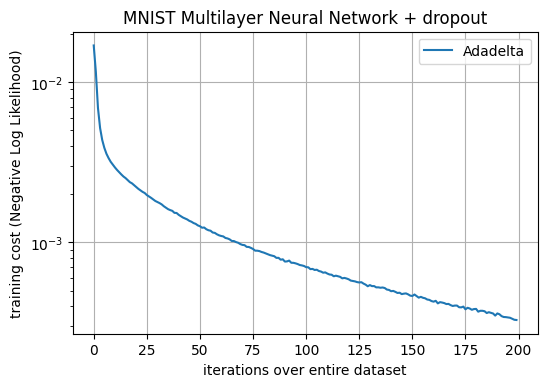

In [ ]:
# Plot the negative log likelihood training cost over iterations
plt.figure(figsize=(6,4), dpi=100)
plt.plot(train_losses_Adadelta, label='Adadelta')
plt.grid(True)

plt.title('MNIST Multilayer Neural Network + dropout')
plt.xlabel('iterations over entire dataset')
plt.ylabel('training cost (Negative Log Likelihood)')
plt.yscale('log')
plt.legend()
plt.show()

## RMSProp

In [ ]:
model = Net().to(device)
criterion = torch.nn.NLLLoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.01)

In [ ]:
# Train the model
train_losses_RMSprop = []
train_accs_RMSprop = []
for epoch in tqdm(range(200)): # number of epochs
    running_loss = 0.0
    running_acc = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        running_acc += (predicted == labels).sum().item() / len(labels)
    epoch_loss = running_loss / len(train_dataset)
    epoch_acc = running_acc / len(train_dataset)
    train_losses_RMSprop.append(epoch_loss)
    train_accs_RMSprop.append(epoch_acc)

    print('Epoch %d: Loss=%.6f Acc=%.6f' % (epoch+1, epoch_loss, epoch_acc))


  0%|          | 1/200 [00:09<32:49,  9.90s/it]

Epoch 1: Loss=0.012591 Acc=0.006580


  1%|          | 2/200 [00:18<29:25,  8.92s/it]

Epoch 2: Loss=0.002340 Acc=0.007177


  2%|▏         | 3/200 [00:26<28:24,  8.65s/it]

Epoch 3: Loss=0.001937 Acc=0.007303


  2%|▏         | 4/200 [00:33<26:43,  8.18s/it]

Epoch 4: Loss=0.001797 Acc=0.007346


  2%|▎         | 5/200 [00:41<26:25,  8.13s/it]

Epoch 5: Loss=0.001737 Acc=0.007375


  3%|▎         | 6/200 [00:50<26:12,  8.10s/it]

Epoch 6: Loss=0.001603 Acc=0.007409


  4%|▎         | 7/200 [00:57<25:28,  7.92s/it]

Epoch 7: Loss=0.001556 Acc=0.007422


  4%|▍         | 8/200 [01:05<25:25,  7.95s/it]

Epoch 8: Loss=0.001521 Acc=0.007444


  4%|▍         | 9/200 [01:13<25:30,  8.01s/it]

Epoch 9: Loss=0.001532 Acc=0.007440


  5%|▌         | 10/200 [01:21<25:07,  7.93s/it]

Epoch 10: Loss=0.001441 Acc=0.007463


  6%|▌         | 11/200 [01:29<25:15,  8.02s/it]

Epoch 11: Loss=0.001377 Acc=0.007475


  6%|▌         | 12/200 [01:37<25:14,  8.05s/it]

Epoch 12: Loss=0.001422 Acc=0.007478


  6%|▋         | 13/200 [01:45<24:35,  7.89s/it]

Epoch 13: Loss=0.001347 Acc=0.007492


  7%|▋         | 14/200 [01:53<24:43,  7.98s/it]

Epoch 14: Loss=0.001366 Acc=0.007494


  8%|▊         | 15/200 [02:01<24:47,  8.04s/it]

Epoch 15: Loss=0.001350 Acc=0.007505


  8%|▊         | 16/200 [02:09<23:59,  7.82s/it]

Epoch 16: Loss=0.001308 Acc=0.007513


  8%|▊         | 17/200 [02:17<24:08,  7.92s/it]

Epoch 17: Loss=0.001294 Acc=0.007514


  9%|▉         | 18/200 [02:25<24:41,  8.14s/it]

Epoch 18: Loss=0.001233 Acc=0.007515


 10%|▉         | 19/200 [02:33<23:58,  7.95s/it]

Epoch 19: Loss=0.001305 Acc=0.007508


 10%|█         | 20/200 [02:41<23:51,  7.95s/it]

Epoch 20: Loss=0.001293 Acc=0.007522


 10%|█         | 21/200 [02:49<23:49,  7.99s/it]

Epoch 21: Loss=0.001215 Acc=0.007533


 11%|█         | 22/200 [02:56<23:02,  7.77s/it]

Epoch 22: Loss=0.001226 Acc=0.007534


 12%|█▏        | 23/200 [03:04<23:15,  7.88s/it]

Epoch 23: Loss=0.001252 Acc=0.007530


 12%|█▏        | 24/200 [03:12<23:00,  7.85s/it]

Epoch 24: Loss=0.001256 Acc=0.007535


 12%|█▎        | 25/200 [03:20<22:39,  7.77s/it]

Epoch 25: Loss=0.001215 Acc=0.007537


 13%|█▎        | 26/200 [03:27<22:38,  7.81s/it]

Epoch 26: Loss=0.001196 Acc=0.007542


 14%|█▎        | 27/200 [03:35<22:12,  7.70s/it]

Epoch 27: Loss=0.001203 Acc=0.007543


 14%|█▍        | 28/200 [03:43<22:18,  7.78s/it]

Epoch 28: Loss=0.001180 Acc=0.007555


 14%|█▍        | 29/200 [03:51<22:19,  7.83s/it]

Epoch 29: Loss=0.001049 Acc=0.007569


 15%|█▌        | 30/200 [03:58<21:49,  7.70s/it]

Epoch 30: Loss=0.001126 Acc=0.007559


 16%|█▌        | 31/200 [04:06<21:54,  7.78s/it]

Epoch 31: Loss=0.001203 Acc=0.007553


 16%|█▌        | 32/200 [04:14<22:07,  7.90s/it]

Epoch 32: Loss=0.001114 Acc=0.007560


 16%|█▋        | 33/200 [04:22<21:30,  7.73s/it]

Epoch 33: Loss=0.001221 Acc=0.007556


 17%|█▋        | 34/200 [04:30<21:36,  7.81s/it]

Epoch 34: Loss=0.001115 Acc=0.007566


 18%|█▊        | 35/200 [04:38<21:42,  7.90s/it]

Epoch 35: Loss=0.001087 Acc=0.007570


 18%|█▊        | 36/200 [04:45<21:05,  7.71s/it]

Epoch 36: Loss=0.001180 Acc=0.007563


 18%|█▊        | 37/200 [04:53<21:08,  7.78s/it]

Epoch 37: Loss=0.001095 Acc=0.007575


 19%|█▉        | 38/200 [05:01<21:07,  7.83s/it]

Epoch 38: Loss=0.001161 Acc=0.007567


 20%|█▉        | 39/200 [05:08<20:42,  7.72s/it]

Epoch 39: Loss=0.001098 Acc=0.007564


 20%|██        | 40/200 [05:16<20:49,  7.81s/it]

Epoch 40: Loss=0.001116 Acc=0.007581


 20%|██        | 41/200 [05:24<20:25,  7.71s/it]

Epoch 41: Loss=0.001081 Acc=0.007583


 21%|██        | 42/200 [05:32<20:28,  7.77s/it]

Epoch 42: Loss=0.001096 Acc=0.007579


 22%|██▏       | 43/200 [05:40<20:33,  7.85s/it]

Epoch 43: Loss=0.001099 Acc=0.007567


 22%|██▏       | 44/200 [05:47<20:02,  7.71s/it]

Epoch 44: Loss=0.001076 Acc=0.007579


 22%|██▎       | 45/200 [05:55<20:09,  7.80s/it]

Epoch 45: Loss=0.001105 Acc=0.007581


 23%|██▎       | 46/200 [06:03<20:15,  7.89s/it]

Epoch 46: Loss=0.001036 Acc=0.007585


 24%|██▎       | 47/200 [06:11<19:43,  7.74s/it]

Epoch 47: Loss=0.001144 Acc=0.007577


 24%|██▍       | 48/200 [06:19<19:43,  7.79s/it]

Epoch 48: Loss=0.001101 Acc=0.007589


 24%|██▍       | 49/200 [06:27<19:45,  7.85s/it]

Epoch 49: Loss=0.001028 Acc=0.007583


 25%|██▌       | 50/200 [06:34<19:17,  7.71s/it]

Epoch 50: Loss=0.001121 Acc=0.007585


 26%|██▌       | 51/200 [06:42<19:24,  7.82s/it]

Epoch 51: Loss=0.001054 Acc=0.007586


 26%|██▌       | 52/200 [06:50<19:26,  7.88s/it]

Epoch 52: Loss=0.001063 Acc=0.007582


 26%|██▋       | 53/200 [06:57<18:52,  7.71s/it]

Epoch 53: Loss=0.001067 Acc=0.007590


 27%|██▋       | 54/200 [07:06<18:59,  7.80s/it]

Epoch 54: Loss=0.001060 Acc=0.007588


 28%|██▊       | 55/200 [07:14<19:03,  7.89s/it]

Epoch 55: Loss=0.001153 Acc=0.007590


 28%|██▊       | 56/200 [07:21<18:32,  7.73s/it]

Epoch 56: Loss=0.001075 Acc=0.007581


 28%|██▊       | 57/200 [07:29<18:36,  7.81s/it]

Epoch 57: Loss=0.001106 Acc=0.007583


 29%|██▉       | 58/200 [07:37<18:33,  7.84s/it]

Epoch 58: Loss=0.001117 Acc=0.007587


 30%|██▉       | 59/200 [07:44<18:14,  7.76s/it]

Epoch 59: Loss=0.001043 Acc=0.007592


 30%|███       | 60/200 [07:52<18:16,  7.83s/it]

Epoch 60: Loss=0.000987 Acc=0.007606


 30%|███       | 61/200 [08:00<17:54,  7.73s/it]

Epoch 61: Loss=0.001079 Acc=0.007593


 31%|███       | 62/200 [08:08<17:52,  7.77s/it]

Epoch 62: Loss=0.001064 Acc=0.007600


 32%|███▏      | 63/200 [08:16<17:56,  7.85s/it]

Epoch 63: Loss=0.001067 Acc=0.007596


 32%|███▏      | 64/200 [08:23<17:25,  7.68s/it]

Epoch 64: Loss=0.001025 Acc=0.007608


 32%|███▎      | 65/200 [08:31<17:30,  7.78s/it]

Epoch 65: Loss=0.001075 Acc=0.007604


 33%|███▎      | 66/200 [08:39<17:36,  7.89s/it]

Epoch 66: Loss=0.001105 Acc=0.007599


 34%|███▎      | 67/200 [08:47<17:08,  7.74s/it]

Epoch 67: Loss=0.001050 Acc=0.007603


 34%|███▍      | 68/200 [08:55<17:08,  7.79s/it]

Epoch 68: Loss=0.001024 Acc=0.007604


 34%|███▍      | 69/200 [09:03<17:09,  7.86s/it]

Epoch 69: Loss=0.001089 Acc=0.007598


 35%|███▌      | 70/200 [09:10<16:46,  7.74s/it]

Epoch 70: Loss=0.001052 Acc=0.007600


 36%|███▌      | 71/200 [09:18<16:46,  7.81s/it]

Epoch 71: Loss=0.001037 Acc=0.007601


 36%|███▌      | 72/200 [09:26<16:42,  7.83s/it]

Epoch 72: Loss=0.001039 Acc=0.007596


 36%|███▋      | 73/200 [09:33<16:15,  7.68s/it]

Epoch 73: Loss=0.000937 Acc=0.007614


 37%|███▋      | 74/200 [09:41<16:21,  7.79s/it]

Epoch 74: Loss=0.001085 Acc=0.007597


 38%|███▊      | 75/200 [09:49<16:16,  7.82s/it]

Epoch 75: Loss=0.000994 Acc=0.007606


 38%|███▊      | 76/200 [09:57<15:56,  7.72s/it]

Epoch 76: Loss=0.000969 Acc=0.007609


 38%|███▊      | 77/200 [10:05<16:02,  7.83s/it]

Epoch 77: Loss=0.000972 Acc=0.007609


 39%|███▉      | 78/200 [10:12<15:44,  7.74s/it]

Epoch 78: Loss=0.001208 Acc=0.007598


 40%|███▉      | 79/200 [10:20<15:38,  7.76s/it]

Epoch 79: Loss=0.001055 Acc=0.007607


 40%|████      | 80/200 [10:28<15:36,  7.80s/it]

Epoch 80: Loss=0.001077 Acc=0.007609


 40%|████      | 81/200 [10:35<15:16,  7.71s/it]

Epoch 81: Loss=0.001022 Acc=0.007613


 41%|████      | 82/200 [10:43<15:18,  7.79s/it]

Epoch 82: Loss=0.001186 Acc=0.007611


 42%|████▏     | 83/200 [10:51<15:16,  7.83s/it]

Epoch 83: Loss=0.000982 Acc=0.007610


 42%|████▏     | 84/200 [10:59<14:53,  7.71s/it]

Epoch 84: Loss=0.001048 Acc=0.007612


 42%|████▎     | 85/200 [11:07<14:55,  7.79s/it]

Epoch 85: Loss=0.001029 Acc=0.007627


 43%|████▎     | 86/200 [11:15<14:57,  7.87s/it]

Epoch 86: Loss=0.001007 Acc=0.007610


 44%|████▎     | 87/200 [11:22<14:29,  7.70s/it]

Epoch 87: Loss=0.001044 Acc=0.007599


 44%|████▍     | 88/200 [11:30<14:31,  7.78s/it]

Epoch 88: Loss=0.000998 Acc=0.007614


 44%|████▍     | 89/200 [11:38<14:29,  7.83s/it]

Epoch 89: Loss=0.001045 Acc=0.007613


 45%|████▌     | 90/200 [11:45<14:08,  7.71s/it]

Epoch 90: Loss=0.001009 Acc=0.007614


 46%|████▌     | 91/200 [11:53<14:09,  7.79s/it]

Epoch 91: Loss=0.001043 Acc=0.007613


 46%|████▌     | 92/200 [12:01<13:57,  7.76s/it]

Epoch 92: Loss=0.000961 Acc=0.007616


 46%|████▋     | 93/200 [12:09<13:43,  7.69s/it]

Epoch 93: Loss=0.001027 Acc=0.007617


 47%|████▋     | 94/200 [12:17<13:44,  7.78s/it]

Epoch 94: Loss=0.000955 Acc=0.007618


 48%|████▊     | 95/200 [12:24<13:21,  7.64s/it]

Epoch 95: Loss=0.001037 Acc=0.007612


 48%|████▊     | 96/200 [12:32<13:26,  7.75s/it]

Epoch 96: Loss=0.000996 Acc=0.007622


 48%|████▊     | 97/200 [12:40<13:30,  7.87s/it]

Epoch 97: Loss=0.000976 Acc=0.007621


 49%|████▉     | 98/200 [12:48<13:09,  7.74s/it]

Epoch 98: Loss=0.000965 Acc=0.007611


 50%|████▉     | 99/200 [12:55<13:07,  7.80s/it]

Epoch 99: Loss=0.001094 Acc=0.007626


 50%|█████     | 100/200 [13:03<13:04,  7.85s/it]

Epoch 100: Loss=0.001040 Acc=0.007619


 50%|█████     | 101/200 [13:11<12:42,  7.71s/it]

Epoch 101: Loss=0.000879 Acc=0.007622


 51%|█████     | 102/200 [13:19<12:42,  7.78s/it]

Epoch 102: Loss=0.001079 Acc=0.007616


 52%|█████▏    | 103/200 [13:27<12:39,  7.83s/it]

Epoch 103: Loss=0.000956 Acc=0.007628


 52%|█████▏    | 104/200 [13:34<12:16,  7.67s/it]

Epoch 104: Loss=0.001037 Acc=0.007622


 52%|█████▎    | 105/200 [13:42<12:24,  7.83s/it]

Epoch 105: Loss=0.000985 Acc=0.007621


 53%|█████▎    | 106/200 [13:50<12:19,  7.86s/it]

Epoch 106: Loss=0.001005 Acc=0.007620


 54%|█████▎    | 107/200 [13:58<11:57,  7.71s/it]

Epoch 107: Loss=0.001007 Acc=0.007617


 54%|█████▍    | 108/200 [14:05<11:56,  7.79s/it]

Epoch 108: Loss=0.001013 Acc=0.007627


 55%|█████▍    | 109/200 [14:13<11:48,  7.78s/it]

Epoch 109: Loss=0.001057 Acc=0.007620


 55%|█████▌    | 110/200 [14:21<11:35,  7.73s/it]

Epoch 110: Loss=0.001127 Acc=0.007611


 56%|█████▌    | 111/200 [14:29<11:32,  7.78s/it]

Epoch 111: Loss=0.001096 Acc=0.007624


 56%|█████▌    | 112/200 [14:36<11:15,  7.67s/it]

Epoch 112: Loss=0.000922 Acc=0.007629


 56%|█████▋    | 113/200 [14:44<11:16,  7.77s/it]

Epoch 113: Loss=0.000950 Acc=0.007626


 57%|█████▋    | 114/200 [14:52<11:11,  7.81s/it]

Epoch 114: Loss=0.000924 Acc=0.007628


 57%|█████▊    | 115/200 [14:59<10:50,  7.66s/it]

Epoch 115: Loss=0.000993 Acc=0.007614


 58%|█████▊    | 116/200 [15:07<10:53,  7.78s/it]

Epoch 116: Loss=0.001026 Acc=0.007626


 58%|█████▊    | 117/200 [15:15<10:52,  7.86s/it]

Epoch 117: Loss=0.000934 Acc=0.007629


 59%|█████▉    | 118/200 [15:23<10:30,  7.69s/it]

Epoch 118: Loss=0.000868 Acc=0.007632


 60%|█████▉    | 119/200 [15:31<10:28,  7.76s/it]

Epoch 119: Loss=0.000991 Acc=0.007621


 60%|██████    | 120/200 [15:39<10:24,  7.81s/it]

Epoch 120: Loss=0.001079 Acc=0.007615


 60%|██████    | 121/200 [15:46<10:04,  7.65s/it]

Epoch 121: Loss=0.001055 Acc=0.007621


 61%|██████    | 122/200 [15:54<10:00,  7.70s/it]

Epoch 122: Loss=0.000971 Acc=0.007619


 62%|██████▏   | 123/200 [16:01<09:50,  7.67s/it]

Epoch 123: Loss=0.001082 Acc=0.007616


 62%|██████▏   | 124/200 [16:09<09:43,  7.68s/it]

Epoch 124: Loss=0.001074 Acc=0.007629


 62%|██████▎   | 125/200 [16:17<09:42,  7.76s/it]

Epoch 125: Loss=0.001055 Acc=0.007624


 63%|██████▎   | 126/200 [16:24<09:21,  7.59s/it]

Epoch 126: Loss=0.000939 Acc=0.007628


 64%|██████▎   | 127/200 [16:32<09:22,  7.70s/it]

Epoch 127: Loss=0.001085 Acc=0.007612


 64%|██████▍   | 128/200 [16:40<09:22,  7.82s/it]

Epoch 128: Loss=0.001005 Acc=0.007616


 64%|██████▍   | 129/200 [16:48<09:06,  7.69s/it]

Epoch 129: Loss=0.001134 Acc=0.007623


 65%|██████▌   | 130/200 [16:56<09:06,  7.80s/it]

Epoch 130: Loss=0.001041 Acc=0.007618


 66%|██████▌   | 131/200 [17:04<09:00,  7.84s/it]

Epoch 131: Loss=0.001040 Acc=0.007624


 66%|██████▌   | 132/200 [17:11<08:45,  7.73s/it]

Epoch 132: Loss=0.001084 Acc=0.007623


 66%|██████▋   | 133/200 [17:19<08:40,  7.77s/it]

Epoch 133: Loss=0.001074 Acc=0.007622


 67%|██████▋   | 134/200 [17:27<08:39,  7.88s/it]

Epoch 134: Loss=0.001094 Acc=0.007619


 68%|██████▊   | 135/200 [17:34<08:20,  7.71s/it]

Epoch 135: Loss=0.001006 Acc=0.007630


 68%|██████▊   | 136/200 [17:42<08:17,  7.77s/it]

Epoch 136: Loss=0.001075 Acc=0.007622


 68%|██████▊   | 137/200 [17:50<08:11,  7.80s/it]

Epoch 137: Loss=0.001064 Acc=0.007626


 69%|██████▉   | 138/200 [17:58<08:00,  7.75s/it]

Epoch 138: Loss=0.000987 Acc=0.007633


 70%|██████▉   | 139/200 [18:06<07:55,  7.79s/it]

Epoch 139: Loss=0.000947 Acc=0.007625


 70%|███████   | 140/200 [18:13<07:36,  7.61s/it]

Epoch 140: Loss=0.000957 Acc=0.007621


 70%|███████   | 141/200 [18:21<07:34,  7.70s/it]

Epoch 141: Loss=0.001123 Acc=0.007618


 71%|███████   | 142/200 [18:29<07:28,  7.74s/it]

Epoch 142: Loss=0.001041 Acc=0.007623


 72%|███████▏  | 143/200 [18:36<07:12,  7.58s/it]

Epoch 143: Loss=0.000945 Acc=0.007632


 72%|███████▏  | 144/200 [18:46<07:52,  8.44s/it]

Epoch 144: Loss=0.000997 Acc=0.007635


 72%|███████▎  | 145/200 [18:55<07:53,  8.61s/it]

Epoch 145: Loss=0.001004 Acc=0.007615


 73%|███████▎  | 146/200 [19:05<07:55,  8.81s/it]

Epoch 146: Loss=0.001065 Acc=0.007625


 74%|███████▎  | 147/200 [19:13<07:33,  8.55s/it]

Epoch 147: Loss=0.000947 Acc=0.007628


 74%|███████▍  | 148/200 [19:21<07:25,  8.57s/it]

Epoch 148: Loss=0.001037 Acc=0.007632


 74%|███████▍  | 149/200 [19:29<07:06,  8.35s/it]

Epoch 149: Loss=0.001034 Acc=0.007620


 75%|███████▌  | 150/200 [19:37<06:52,  8.26s/it]

Epoch 150: Loss=0.001132 Acc=0.007622


 76%|███████▌  | 151/200 [19:45<06:47,  8.31s/it]

Epoch 151: Loss=0.000999 Acc=0.007633


 76%|███████▌  | 152/200 [19:53<06:32,  8.18s/it]

Epoch 152: Loss=0.001196 Acc=0.007620


 76%|███████▋  | 153/200 [20:01<06:23,  8.16s/it]

Epoch 153: Loss=0.000962 Acc=0.007630


 77%|███████▋  | 154/200 [20:09<06:12,  8.09s/it]

Epoch 154: Loss=0.000996 Acc=0.007622


 78%|███████▊  | 155/200 [20:18<06:10,  8.23s/it]

Epoch 155: Loss=0.001134 Acc=0.007628


 78%|███████▊  | 156/200 [20:26<06:01,  8.22s/it]

Epoch 156: Loss=0.001129 Acc=0.007626


 78%|███████▊  | 157/200 [20:35<06:04,  8.47s/it]

Epoch 157: Loss=0.001143 Acc=0.007617


 79%|███████▉  | 158/200 [20:44<05:57,  8.50s/it]

Epoch 158: Loss=0.000914 Acc=0.007642


 80%|███████▉  | 159/200 [20:53<05:54,  8.63s/it]

Epoch 159: Loss=0.000956 Acc=0.007628


 80%|████████  | 160/200 [21:00<05:28,  8.22s/it]

Epoch 160: Loss=0.001020 Acc=0.007631


 80%|████████  | 161/200 [21:08<05:16,  8.11s/it]

Epoch 161: Loss=0.001002 Acc=0.007630


 81%|████████  | 162/200 [21:15<05:01,  7.92s/it]

Epoch 162: Loss=0.001018 Acc=0.007631


 82%|████████▏ | 163/200 [21:23<04:50,  7.86s/it]

Epoch 163: Loss=0.001268 Acc=0.007615


 82%|████████▏ | 164/200 [21:32<04:50,  8.08s/it]

Epoch 164: Loss=0.001084 Acc=0.007623


 82%|████████▎ | 165/200 [21:44<05:27,  9.36s/it]

Epoch 165: Loss=0.001117 Acc=0.007631


 83%|████████▎ | 166/200 [21:55<05:37,  9.93s/it]

Epoch 166: Loss=0.001119 Acc=0.007615


 84%|████████▎ | 167/200 [22:02<05:00,  9.12s/it]

Epoch 167: Loss=0.001093 Acc=0.007638


 84%|████████▍ | 168/200 [22:11<04:47,  8.99s/it]

Epoch 168: Loss=0.001202 Acc=0.007609


 84%|████████▍ | 169/200 [22:19<04:28,  8.67s/it]

Epoch 169: Loss=0.001128 Acc=0.007626


 85%|████████▌ | 170/200 [22:26<04:06,  8.23s/it]

Epoch 170: Loss=0.001086 Acc=0.007623


 86%|████████▌ | 171/200 [22:34<03:55,  8.12s/it]

Epoch 171: Loss=0.000989 Acc=0.007628


 86%|████████▌ | 172/200 [22:43<03:52,  8.30s/it]

Epoch 172: Loss=0.001060 Acc=0.007626


 86%|████████▋ | 173/200 [22:50<03:35,  7.99s/it]

Epoch 173: Loss=0.001103 Acc=0.007632


 87%|████████▋ | 174/200 [22:58<03:30,  8.11s/it]

Epoch 174: Loss=0.001055 Acc=0.007627


 88%|████████▊ | 175/200 [23:06<03:21,  8.06s/it]

Epoch 175: Loss=0.001173 Acc=0.007618


 88%|████████▊ | 176/200 [23:14<03:10,  7.95s/it]

Epoch 176: Loss=0.001052 Acc=0.007630


 88%|████████▊ | 177/200 [23:22<03:04,  8.04s/it]

Epoch 177: Loss=0.001094 Acc=0.007624


 89%|████████▉ | 178/200 [23:30<02:56,  8.01s/it]

Epoch 178: Loss=0.001268 Acc=0.007636


 90%|████████▉ | 179/200 [23:38<02:44,  7.82s/it]

Epoch 179: Loss=0.001060 Acc=0.007637


 90%|█████████ | 180/200 [23:46<02:36,  7.85s/it]

Epoch 180: Loss=0.001016 Acc=0.007629


 90%|█████████ | 181/200 [23:53<02:28,  7.79s/it]

Epoch 181: Loss=0.001188 Acc=0.007624


 91%|█████████ | 182/200 [24:01<02:18,  7.69s/it]

Epoch 182: Loss=0.000983 Acc=0.007632


 92%|█████████▏| 183/200 [24:09<02:11,  7.76s/it]

Epoch 183: Loss=0.001165 Acc=0.007623


 92%|█████████▏| 184/200 [24:16<02:01,  7.60s/it]

Epoch 184: Loss=0.001079 Acc=0.007632


 92%|█████████▎| 185/200 [24:24<01:55,  7.70s/it]

Epoch 185: Loss=0.001116 Acc=0.007637


 93%|█████████▎| 186/200 [24:32<01:49,  7.79s/it]

Epoch 186: Loss=0.001022 Acc=0.007633


 94%|█████████▎| 187/200 [24:39<01:39,  7.67s/it]

Epoch 187: Loss=0.001161 Acc=0.007635


 94%|█████████▍| 188/200 [24:47<01:33,  7.76s/it]

Epoch 188: Loss=0.001116 Acc=0.007627


 94%|█████████▍| 189/200 [24:55<01:25,  7.81s/it]

Epoch 189: Loss=0.001086 Acc=0.007631


 95%|█████████▌| 190/200 [25:02<01:16,  7.66s/it]

Epoch 190: Loss=0.001134 Acc=0.007610


 96%|█████████▌| 191/200 [25:11<01:11,  7.91s/it]

Epoch 191: Loss=0.000991 Acc=0.007633


 96%|█████████▌| 192/200 [25:19<01:03,  7.91s/it]

Epoch 192: Loss=0.001231 Acc=0.007614


 96%|█████████▋| 193/200 [25:26<00:54,  7.76s/it]

Epoch 193: Loss=0.001274 Acc=0.007600


 97%|█████████▋| 194/200 [25:34<00:46,  7.79s/it]

Epoch 194: Loss=0.001152 Acc=0.007622


 98%|█████████▊| 195/200 [25:42<00:39,  7.80s/it]

Epoch 195: Loss=0.000974 Acc=0.007630


 98%|█████████▊| 196/200 [25:49<00:30,  7.71s/it]

Epoch 196: Loss=0.001147 Acc=0.007630


 98%|█████████▊| 197/200 [25:57<00:23,  7.81s/it]

Epoch 197: Loss=0.001225 Acc=0.007632


 99%|█████████▉| 198/200 [26:05<00:15,  7.72s/it]

Epoch 198: Loss=0.001050 Acc=0.007628


100%|█████████▉| 199/200 [26:13<00:07,  7.73s/it]

Epoch 199: Loss=0.001237 Acc=0.007619


100%|██████████| 200/200 [26:21<00:00,  7.91s/it]

Epoch 200: Loss=0.001063 Acc=0.007620


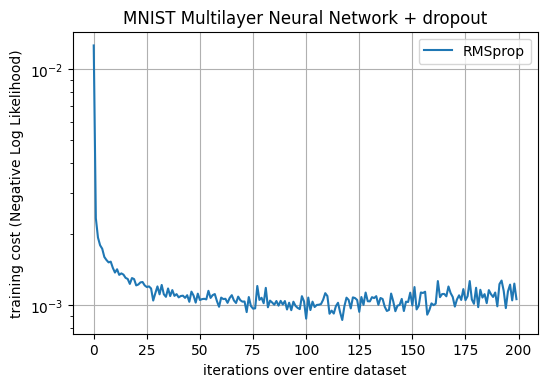

In [ ]:
# Plot the negative log likelihood training cost over iterations
plt.figure(figsize=(6,4), dpi=100)
plt.plot(train_losses_RMSprop, label='RMSprop')
plt.grid(True)

plt.title('MNIST Multilayer Neural Network + dropout')
plt.xlabel('iterations over entire dataset')
plt.ylabel('training cost (Negative Log Likelihood)')
plt.yscale('log')
plt.legend()
plt.show()

## Visualization

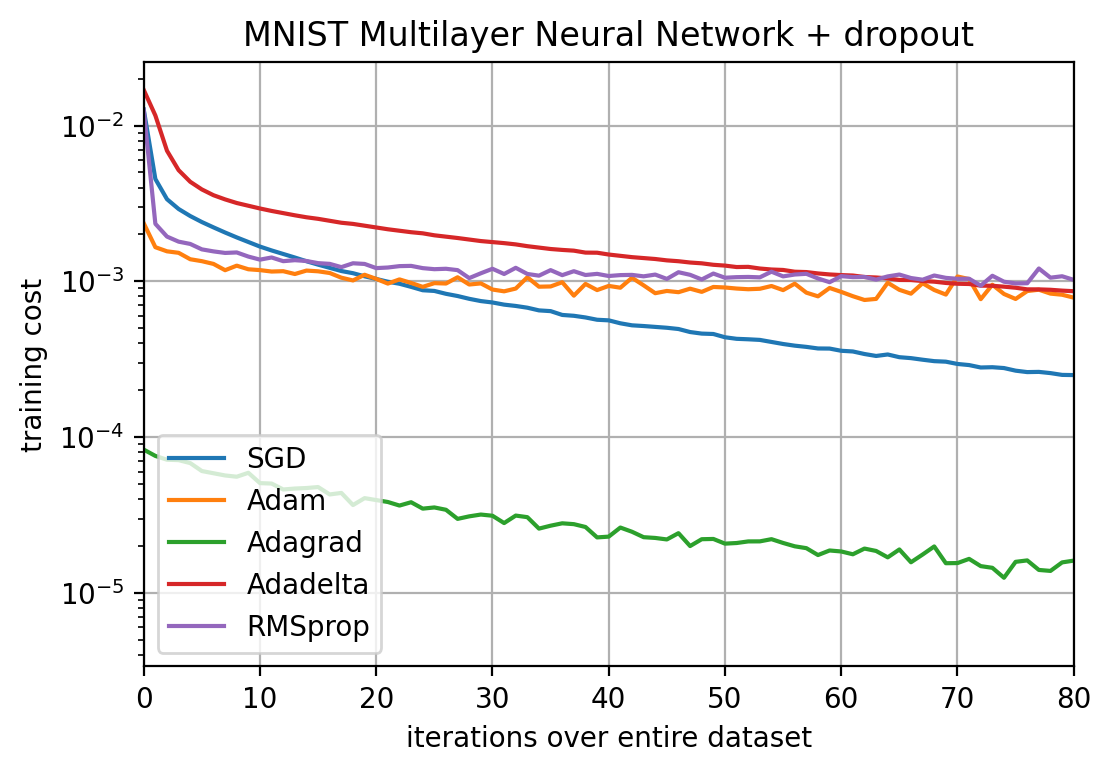

In [ ]:
# logs = [
#         np.array(train_losses_SGD), 
#         np.array(train_losses_Adam), 
#         np.array(train_losses_Adagrad), 
#         np.array(train_losses_Adadelta), 
#         np.array(train_losses_RMSprop)]

logs = [
        train_losses_SGD, 
        train_losses_Adam, 
        train_losses_Adagrad, 
        train_losses_Adadelta, 
        train_losses_RMSprop]

names = ['SGD', 'Adam', 'Adagrad', 'Adadelta', 'RMSprop']

plt.figure(dpi=200)
for log, name in zip(logs, names):
    plt.plot(log, label=name)

plt.grid(True)
plt.legend()
plt.title('MNIST Multilayer Neural Network + dropout')
plt.xlabel('iterations over entire dataset')
plt.ylabel('training cost')
plt.xlim(0,80)
# plt.ylim(0)
plt.savefig('fig3a.png')
plt.yscale('log')
plt.legend(loc='lower left')
plt.show()